### Libraries Loading

In [182]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Data Loading

In [183]:
df = pd.read_csv('../data/consolidated_data/all.csv')

### Initial Data Review

In [184]:
df.head(5)

Unnamed: 0        date            state  cases_new  cases_import  \
0           0  2020-01-25            Johor          4             4   
1           1  2020-01-25            Kedah          0             0   
2           2  2020-01-25         Kelantan          0             0   
3           3  2020-01-25           Melaka          0             0   
4           4  2020-01-25  Negeri Sembilan          0             0   

   cases_recovered  cases_active  cases_cluster  cases_unvax  cases_pvax  ...  \
0                0             4              0            4           0  ...   
1                0             0              0            0           0  ...   
2                0             0              0            0           0  ...   
3                0             0              0            0           0  ...   
4                0             0              0            0           0  ...   

   beds_pkrc  admitted_pui_pkrc  admitted_covid_pkrc  admitted_total_pkrc  \
0        NaN                NaN                  NaN                  NaN   
1        NaN                NaN                  NaN                  NaN   
2        NaN                NaN                  NaN                  NaN   
3        NaN                NaN                  NaN                  NaN   
4        NaN                NaN                  NaN                  NaN   

   discharged_pui_pkrc  discharged_covid_pkrc  discharged_total_pkrc  \
0                  NaN                    NaN                    NaN   
1                  NaN                    NaN                    NaN   
2                  NaN                    NaN                    NaN   
3                  NaN                    NaN                    NaN   
4                  NaN                    NaN                    NaN   

   pkrc_covid_pkrc  pkrc_pui_pkrc  pkrc_noncovid_pkrc  
0              NaN            NaN                 NaN  
1              NaN            NaN                 NaN  
2              NaN            NaN                 NaN  
3              NaN            NaN                 NaN  
4              NaN            NaN                 NaN  

[5 rows x 124 columns]

In [185]:
#Small Cleaning
df.drop(columns=['Unnamed: 0'],inplace=True)

In [186]:
df.columns

Index(['date', 'state', 'cases_new', 'cases_import', 'cases_recovered',
       'cases_active', 'cases_cluster', 'cases_unvax', 'cases_pvax',
       'cases_fvax',
       ...
       'beds_pkrc', 'admitted_pui_pkrc', 'admitted_covid_pkrc',
       'admitted_total_pkrc', 'discharged_pui_pkrc', 'discharged_covid_pkrc',
       'discharged_total_pkrc', 'pkrc_covid_pkrc', 'pkrc_pui_pkrc',
       'pkrc_noncovid_pkrc'],
      dtype='object', length=123)

In [187]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24768 entries, 0 to 24767
Columns: 123 entries, date to pkrc_noncovid_pkrc
dtypes: float64(98), int64(23), object(2)
memory usage: 23.2+ MB


### Dimensionality Reduction

In [188]:
for i in df.columns:
    print(i)

date
state
cases_new
cases_import
cases_recovered
cases_active
cases_cluster
cases_unvax
cases_pvax
cases_fvax
cases_boost
cases_child
cases_adolescent
cases_adult
cases_elderly
cases_0_4
cases_5_11
cases_12_17
cases_18_29
cases_30_39
cases_40_49
cases_50_59
cases_60_69
cases_70_79
cases_80
deaths_new
deaths_bid
deaths_new_dod
deaths_bid_dod
deaths_unvax
deaths_pvax
deaths_fvax
deaths_boost
deaths_tat
rtk-ag_x
pcr_x
rtk-ag_y
pcr_y
daily_partial
daily_full
daily_booster
daily_booster2
daily
daily_partial_adol
daily_full_adol
daily_booster_adol
daily_booster2_adol
daily_partial_child
daily_full_child
daily_booster_child
daily_booster2_child
cumul_partial
cumul_full
cumul_booster
cumul_booster2
cumul
cumul_partial_adol
cumul_full_adol
cumul_booster_adol
cumul_booster2_adol
cumul_partial_child
cumul_full_child
cumul_booster_child
cumul_booster2_child
pfizer1
pfizer2
pfizer3
pfizer4
sinovac1
sinovac2
sinovac3
sinovac4
astra1
astra2
astra3
astra4
sinopharm1
sinopharm2
sinopharm3
sinopharm4
c

### 

In [189]:
df['pcr_x'].equals(df['pcr_y'])

True

In [190]:
df['rtk-ag_x'].equals(df['rtk-ag_y'])

True

In [191]:
#Consolidate Variables 
#Total vaccination doses given out
df['pfizer'] = df['pfizer1']+df['pfizer2']+df['pfizer3']+df['pfizer4']
df['astra'] = df['astra1']+df['astra2']+df['astra3']+df['astra4']
df['sinopharm'] = df['sinopharm1']+df['sinopharm2']+df['sinopharm3']+df['sinopharm4']
df['sinovac'] = df['sinovac1']+df['sinovac2']+df['sinovac3']+df['sinovac4']
df['cansino'] = df['cansino']+df['cansino3']+df['cansino4']

In [192]:
# Drop Columns
df.drop(columns=['cases_cluster',
'cases_child','cases_adolescent','cases_adult', 'deaths_new', 'deaths_bid',
'cases_elderly','deaths_unvax','deaths_pvax','deaths_fvax','deaths_boost','deaths_tat','pfizer1',
'pfizer2',
'pfizer3',
'pfizer4',
'sinovac1',
'sinovac2',
'sinovac3',
'sinovac4',
'astra1',
'astra2',
'astra3',
'astra4',
'sinopharm1',
'sinopharm2',
'sinopharm3',
'sinopharm4',
'cansino',
'cansino3',
'cansino4',
'pending1',
'pending2',
'pending3',
'pending4',
'pcr_y',
'rtk-ag_y',
'cumul_full', 'cumul_booster', 'cumul_booster2', 'cumul',
'cumul_partial_adol', 'cumul_full_adol', 'cumul_booster_adol',
'cumul_booster2_adol', 'cumul_partial_child', 'cumul_full_child',
'cumul_booster_child', 'cumul_booster2_child','beds_noncrit_hospital',
'beds_icu_rep','vent_port', 'vent_noncovid','daily_partial_adol','daily_partial_child','daily_full_child','daily_full_adol','daily_booster_adol',
'daily_booster2_adol','daily_booster_child','daily_booster2_child','cumul_partial'
],inplace=True)

In [193]:
df.columns

Index(['date', 'state', 'cases_new', 'cases_import', 'cases_recovered',
       'cases_active', 'cases_unvax', 'cases_pvax', 'cases_fvax',
       'cases_boost', 'cases_0_4', 'cases_5_11', 'cases_12_17', 'cases_18_29',
       'cases_30_39', 'cases_40_49', 'cases_50_59', 'cases_60_69',
       'cases_70_79', 'cases_80', 'deaths_new_dod', 'deaths_bid_dod',
       'rtk-ag_x', 'pcr_x', 'daily_partial', 'daily_full', 'daily_booster',
       'daily_booster2', 'daily', 'beds_hospital', 'beds_covid_hospital',
       'admitted_pui_hospital', 'admitted_covid_hospital',
       'admitted_total_hospital', 'discharged_pui_hospital',
       'discharged_covid_hospital', 'discharged_total_hospital',
       'hosp_covid_hospital', 'hosp_pui_hospital', 'hosp_noncovid_hospital',
       'beds_icu', 'beds_icu_total', 'beds_icu_covid', 'vent', 'icu_covid',
       'icu_pui', 'icu_noncovid', 'vent_covid', 'vent_pui', 'vent_used',
       'vent_port_used', 'beds_pkrc', 'admitted_pui_pkrc',
       'admitted_covid_pkr

IDR

In [194]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24768 entries, 0 to 24767
Data columns (total 65 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   date                       24768 non-null  object 
 1   state                      24768 non-null  object 
 2   cases_new                  24768 non-null  int64  
 3   cases_import               24768 non-null  int64  
 4   cases_recovered            24768 non-null  int64  
 5   cases_active               24768 non-null  int64  
 6   cases_unvax                24768 non-null  int64  
 7   cases_pvax                 24768 non-null  int64  
 8   cases_fvax                 24768 non-null  int64  
 9   cases_boost                24768 non-null  int64  
 10  cases_0_4                  24768 non-null  int64  
 11  cases_5_11                 24768 non-null  int64  
 12  cases_12_17                24768 non-null  int64  
 13  cases_18_29                24768 non-null  int

In [195]:
df.describe()

cases_new  cases_import  cases_recovered   cases_active  \
count  24768.00000  24768.000000     24768.000000   24768.000000   
mean     213.17244      1.580709       211.336281    2599.339470   
std      627.11245      9.378788       633.463726    7190.493069   
min        0.00000      0.000000         0.000000    -630.000000   
25%        2.00000      0.000000         2.000000      57.000000   
50%       24.00000      0.000000        22.000000     491.500000   
75%      152.00000      0.000000       144.000000    2159.000000   
max    11692.00000    351.000000     12379.000000  103574.000000   

        cases_unvax    cases_pvax    cases_fvax   cases_boost     cases_0_4  \
count  24768.000000  24768.000000  24768.000000  24768.000000  24768.000000   
mean      82.347626     17.632833     57.008035     56.183947     10.584504   
std      265.922475    125.481625    197.029996    269.697437     32.940774   
min       -1.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        5.000000      0.000000      2.000000      1.000000      1.000000   
75%       39.000000      1.000000     20.000000     19.000000      6.000000   
max     6112.000000   3895.000000   3614.000000   7652.000000    593.000000   

         cases_5_11  ...  discharged_pui_pkrc  discharged_covid_pkrc  \
count  24768.000000  ...         10001.000000           10001.000000   
mean      15.471899  ...             2.071493              72.374363   
std       48.961621  ...             8.561354             148.296442   
min        0.000000  ...             0.000000               0.000000   
25%        0.000000  ...             0.000000               0.000000   
50%        1.000000  ...             0.000000              17.000000   
75%        8.000000  ...             1.000000              78.000000   
max      913.000000  ...           305.000000            2278.000000   

       discharged_total_pkrc  pkrc_covid_pkrc  pkrc_pui_pkrc  \
count           10001.000000     10001.000000   10001.000000   
mean               74.445855       530.929107      23.163984   
std               150.116051       932.410396      84.783623   
min                 0.000000         0.000000       0.000000   
25%                 1.000000        10.000000       0.000000   
50%                18.000000       138.000000       0.000000   
75%                81.000000       576.000000       9.000000   
max              2278.000000      6685.000000    1079.000000   

       pkrc_noncovid_pkrc        pfizer         astra     sinopharm  \
count        10001.000000  18432.000000  18432.000000  18432.000000   
mean            14.397660   2444.827203    309.661784      2.403754   
std             38.320941   5887.708375   1620.710039     15.868323   
min              0.000000    -93.000000      0.000000      0.000000   
25%              0.000000      0.000000      0.000000      0.000000   
50%              0.000000     85.000000      0.000000      0.000000   
75%              0.000000   1698.750000      0.000000      0.000000   
max            884.000000  58014.000000  31659.000000    415.000000   

             sinovac  
count   18432.000000  
mean     1171.467936  
std      5871.001597  
min         0.000000  
25%         0.000000  
50%         5.000000  
75%        89.250000  
max    111830.000000  

[8 rows x 63 columns]

In [196]:
df.shape

(24768, 65)

## Data Cleaning

In [199]:
df.columns

Index(['date', 'state', 'cases_new', 'cases_import', 'cases_recovered',
       'cases_active', 'cases_unvax', 'cases_pvax', 'cases_fvax',
       'cases_boost', 'cases_0_4', 'cases_5_11', 'cases_12_17', 'cases_18_29',
       'cases_30_39', 'cases_40_49', 'cases_50_59', 'cases_60_69',
       'cases_70_79', 'cases_80', 'deaths_new_dod', 'deaths_bid_dod',
       'rtk-ag_x', 'pcr_x', 'daily_partial', 'daily_full', 'daily_booster',
       'daily_booster2', 'daily', 'beds_hospital', 'beds_covid_hospital',
       'admitted_pui_hospital', 'admitted_covid_hospital',
       'admitted_total_hospital', 'discharged_pui_hospital',
       'discharged_covid_hospital', 'discharged_total_hospital',
       'hosp_covid_hospital', 'hosp_pui_hospital', 'hosp_noncovid_hospital',
       'beds_icu', 'beds_icu_total', 'beds_icu_covid', 'vent', 'icu_covid',
       'icu_pui', 'icu_noncovid', 'vent_covid', 'vent_pui', 'vent_used',
       'vent_port_used', 'beds_pkrc', 'admitted_pui_pkrc',
       'admitted_covid_pkr

## Initial Preprocessing

Checking for Missing Values

In [200]:
df.isna().sum()

date                      0
state                     0
cases_new                 0
cases_import              0
cases_recovered           0
                      ...  
pkrc_noncovid_pkrc    14767
pfizer                 6336
astra                  6336
sinopharm              6336
sinovac                6336
Length: 65, dtype: int64

In [201]:
null = df.isnull().sum()
for c, v in null.items():
    print(f"{c}: {v}")

date: 0
state: 0
cases_new: 0
cases_import: 0
cases_recovered: 0
cases_active: 0
cases_unvax: 0
cases_pvax: 0
cases_fvax: 0
cases_boost: 0
cases_0_4: 0
cases_5_11: 0
cases_12_17: 0
cases_18_29: 0
cases_30_39: 0
cases_40_49: 0
cases_50_59: 0
cases_60_69: 0
cases_70_79: 0
cases_80: 0
deaths_new_dod: 832
deaths_bid_dod: 832
rtk-ag_x: 8480
pcr_x: 8480
daily_partial: 6336
daily_full: 6336
daily_booster: 6336
daily_booster2: 6336
daily: 6336
beds_hospital: 1421
beds_covid_hospital: 1421
admitted_pui_hospital: 1421
admitted_covid_hospital: 1421
admitted_total_hospital: 1421
discharged_pui_hospital: 1421
discharged_covid_hospital: 1421
discharged_total_hospital: 1421
hosp_covid_hospital: 1421
hosp_pui_hospital: 1421
hosp_noncovid_hospital: 1421
beds_icu: 1441
beds_icu_total: 1441
beds_icu_covid: 1441
vent: 1441
icu_covid: 1441
icu_pui: 1441
icu_noncovid: 1441
vent_covid: 1441
vent_pui: 1441
vent_used: 1441
vent_port_used: 1441
beds_pkrc: 14767
admitted_pui_pkrc: 14767
admitted_covid_pkrc: 1476

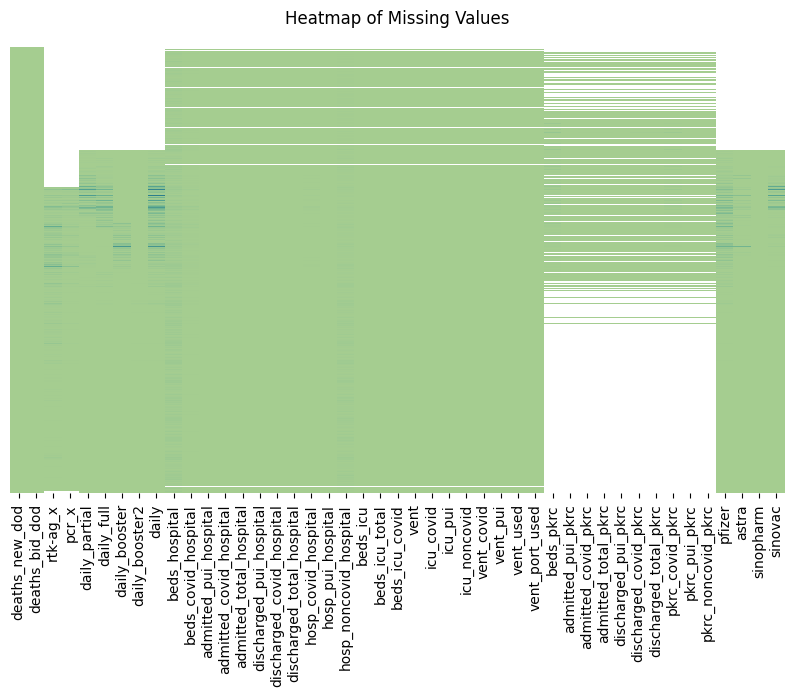

In [202]:
plt.figure(figsize=(10, 6))
sns.heatmap(df[df.columns[df.isna().any()]],cmap="crest",cbar=False,yticklabels=False)
plt.title('Heatmap of Missing Values')
plt.show()

Imputing Missing Values

In [203]:
#Imputing with 0
#As 0 accurately represents the situation
df['deaths_new_dod'] = df['deaths_new_dod'].fillna(0)
df['deaths_bid_dod'] = df['deaths_bid_dod'].fillna(0)
df['rtk-ag_x'] = df['rtk-ag_x'].fillna(0)
df['pcr_x'] = df['pcr_x'].fillna(0)
df['daily_partial'] = df['daily_partial'].fillna(0)
df['daily_full'] = df['daily_full'].fillna(0)
df['daily_booster'] = df['daily_booster'].fillna(0)
df['daily_booster2'] = df['daily_booster2'].fillna(0)
df['daily'] = df['daily'].fillna(0)
df.fillna({'pfizer': 0}, inplace=True)
df.fillna({'astra': 0}, inplace=True)
df.fillna({'sinopharm': 0}, inplace=True)
df.fillna({'sinovac': 0}, inplace=True)

In [204]:
df.columns[df.isna().any()]

Index(['beds_hospital', 'beds_covid_hospital', 'admitted_pui_hospital',
       'admitted_covid_hospital', 'admitted_total_hospital',
       'discharged_pui_hospital', 'discharged_covid_hospital',
       'discharged_total_hospital', 'hosp_covid_hospital', 'hosp_pui_hospital',
       'hosp_noncovid_hospital', 'beds_icu', 'beds_icu_total',
       'beds_icu_covid', 'vent', 'icu_covid', 'icu_pui', 'icu_noncovid',
       'vent_covid', 'vent_pui', 'vent_used', 'vent_port_used', 'beds_pkrc',
       'admitted_pui_pkrc', 'admitted_covid_pkrc', 'admitted_total_pkrc',
       'discharged_pui_pkrc', 'discharged_covid_pkrc', 'discharged_total_pkrc',
       'pkrc_covid_pkrc', 'pkrc_pui_pkrc', 'pkrc_noncovid_pkrc'],
      dtype='object')

#### Imputing Tests

In [205]:
pkrc_col = ['beds_pkrc',
       'admitted_pui_pkrc', 'admitted_covid_pkrc', 'admitted_total_pkrc',
       'discharged_pui_pkrc', 'discharged_covid_pkrc', 'discharged_total_pkrc',
       'pkrc_covid_pkrc', 'pkrc_pui_pkrc', 'pkrc_noncovid_pkrc']

for columns in pkrc_col:
    print(f'{columns} : {(df[columns].isna().sum()/len(df)) * 100:.2f}%')
    

beds_pkrc : 59.62%
admitted_pui_pkrc : 59.62%
admitted_covid_pkrc : 59.62%
admitted_total_pkrc : 59.62%
discharged_pui_pkrc : 59.62%
discharged_covid_pkrc : 59.62%
discharged_total_pkrc : 59.62%
pkrc_covid_pkrc : 59.62%
pkrc_pui_pkrc : 59.62%
pkrc_noncovid_pkrc : 59.62%


In [206]:
df.drop(columns=['beds_pkrc',
       'admitted_pui_pkrc', 'admitted_covid_pkrc', 'admitted_total_pkrc',
       'discharged_pui_pkrc', 'discharged_covid_pkrc', 'discharged_total_pkrc',
       'pkrc_covid_pkrc', 'pkrc_pui_pkrc', 'pkrc_noncovid_pkrc'],inplace=True)

In [207]:
mean_columns  = []
median_columns = []
for column in df.columns[df.isna().any()]:
    skew = df[column].skew()
    if skew <= 2 and skew >= -2 :
        print(f'{column} skewness : {df[column].skew():.2f} : Mean')
        mean_columns.append(column)
    else:
        print(f'{column} skewness : {df[column].skew():.2f} : Median')
        median_columns.append(column)

beds_hospital skewness : 0.50 : Mean
beds_covid_hospital skewness : 2.88 : Median
admitted_pui_hospital skewness : 3.54 : Median
admitted_covid_hospital skewness : 4.76 : Median
admitted_total_hospital skewness : 3.93 : Median
discharged_pui_hospital skewness : 3.29 : Median
discharged_covid_hospital skewness : 5.13 : Median
discharged_total_hospital skewness : 4.27 : Median
hosp_covid_hospital skewness : 5.67 : Median
hosp_pui_hospital skewness : 3.82 : Median
hosp_noncovid_hospital skewness : 0.79 : Mean
beds_icu skewness : 1.15 : Mean
beds_icu_total skewness : 1.36 : Mean
beds_icu_covid skewness : 2.67 : Median
vent skewness : 1.92 : Mean
icu_covid skewness : 5.81 : Median
icu_pui skewness : 19.41 : Median
icu_noncovid skewness : 0.80 : Mean
vent_covid skewness : 6.24 : Median
vent_pui skewness : 17.65 : Median
vent_used skewness : 1.70 : Mean
vent_port_used skewness : 1.78 : Mean


In [208]:
mean_columns

['beds_hospital',
 'hosp_noncovid_hospital',
 'beds_icu',
 'beds_icu_total',
 'vent',
 'icu_noncovid',
 'vent_used',
 'vent_port_used']

In [209]:
median_columns

['beds_covid_hospital',
 'admitted_pui_hospital',
 'admitted_covid_hospital',
 'admitted_total_hospital',
 'discharged_pui_hospital',
 'discharged_covid_hospital',
 'discharged_total_hospital',
 'hosp_covid_hospital',
 'hosp_pui_hospital',
 'beds_icu_covid',
 'icu_covid',
 'icu_pui',
 'vent_covid',
 'vent_pui']

Mean

In [210]:
for column in mean_columns:
    df.fillna({column: df[column].mean()}, inplace=True)

Median

In [211]:
for column in median_columns:
    df.fillna({column: df[column].median()}, inplace=True)

In [212]:
df.isna().sum()

date                         0
state                        0
cases_new                    0
cases_import                 0
cases_recovered              0
cases_active                 0
cases_unvax                  0
cases_pvax                   0
cases_fvax                   0
cases_boost                  0
cases_0_4                    0
cases_5_11                   0
cases_12_17                  0
cases_18_29                  0
cases_30_39                  0
cases_40_49                  0
cases_50_59                  0
cases_60_69                  0
cases_70_79                  0
cases_80                     0
deaths_new_dod               0
deaths_bid_dod               0
rtk-ag_x                     0
pcr_x                        0
daily_partial                0
daily_full                   0
daily_booster                0
daily_booster2               0
daily                        0
beds_hospital                0
beds_covid_hospital          0
admitted_pui_hospital        0
admitted

Check for duplicate indexes

In [213]:
df[df.duplicated(['date','state'])]

Empty DataFrame
Columns: [date, state, cases_new, cases_import, cases_recovered, cases_active, cases_unvax, cases_pvax, cases_fvax, cases_boost, cases_0_4, cases_5_11, cases_12_17, cases_18_29, cases_30_39, cases_40_49, cases_50_59, cases_60_69, cases_70_79, cases_80, deaths_new_dod, deaths_bid_dod, rtk-ag_x, pcr_x, daily_partial, daily_full, daily_booster, daily_booster2, daily, beds_hospital, beds_covid_hospital, admitted_pui_hospital, admitted_covid_hospital, admitted_total_hospital, discharged_pui_hospital, discharged_covid_hospital, discharged_total_hospital, hosp_covid_hospital, hosp_pui_hospital, hosp_noncovid_hospital, beds_icu, beds_icu_total, beds_icu_covid, vent, icu_covid, icu_pui, icu_noncovid, vent_covid, vent_pui, vent_used, vent_port_used, pfizer, astra, sinopharm, sinovac]
Index: []

[0 rows x 55 columns]

### Feature Engineering

In [214]:
df.columns

Index(['date', 'state', 'cases_new', 'cases_import', 'cases_recovered',
       'cases_active', 'cases_unvax', 'cases_pvax', 'cases_fvax',
       'cases_boost', 'cases_0_4', 'cases_5_11', 'cases_12_17', 'cases_18_29',
       'cases_30_39', 'cases_40_49', 'cases_50_59', 'cases_60_69',
       'cases_70_79', 'cases_80', 'deaths_new_dod', 'deaths_bid_dod',
       'rtk-ag_x', 'pcr_x', 'daily_partial', 'daily_full', 'daily_booster',
       'daily_booster2', 'daily', 'beds_hospital', 'beds_covid_hospital',
       'admitted_pui_hospital', 'admitted_covid_hospital',
       'admitted_total_hospital', 'discharged_pui_hospital',
       'discharged_covid_hospital', 'discharged_total_hospital',
       'hosp_covid_hospital', 'hosp_pui_hospital', 'hosp_noncovid_hospital',
       'beds_icu', 'beds_icu_total', 'beds_icu_covid', 'vent', 'icu_covid',
       'icu_pui', 'icu_noncovid', 'vent_covid', 'vent_pui', 'vent_used',
       'vent_port_used', 'pfizer', 'astra', 'sinopharm', 'sinovac'],
      dtype='obj

Date

In [215]:
df['date'] = pd.to_datetime(df['date'])
df['day'] = df['date'].dt.day
df['month'] = df['date'].dt.month
df['day_text'] = df['date'].dt.weekday + 1

State Var Per Capita

In [216]:
df_state_pop = pd.read_csv('../data/static/population.csv')
df_state_pop.set_index('state',inplace=True)
dict_pop = df_state_pop.to_dict()

In [217]:
df['cases_new_capita'] = df['cases_new'] / df['state'].map(dict_pop['pop'])
df['deaths_new_dod_capita'] = df['deaths_new_dod'] / df['state'].map(dict_pop['pop'])
df['daily_full_capita'] = df['daily_full'] / df['state'].map(dict_pop['pop'])

Cumulative Variables

In [218]:
df['total_tests'] = df['rtk-ag_x'] + df['pcr_x']

In [219]:
df['cases_new_cumul'] = df['cases_new'].cumsum()
df['deaths_new_dod_cumul'] = df['deaths_new_dod'].cumsum()
df['daily_cumul'] = df['daily'].cumsum()
df['daily_full_cumul'] = df['daily_full'].cumsum()
df['rtk-ag_x_cumul'] =  df['rtk-ag_x'].cumsum()
df['pcr_x_cumul'] =  df['pcr_x'].cumsum()
df['astra_cumul'] =  df['astra'].cumsum()
df['pfizer_cumul'] =  df['pfizer'].cumsum()
df['sinopharm_x_cumul'] =  df['sinopharm'].cumsum()
df['sinovac_cumul'] =  df['sinovac'].cumsum()

In [220]:
#Note Data Noise
for i in df['cases_new'].pct_change() * 100:
    print(i)

nan
-100.0
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
inf
-50.0
-100.0
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
inf
-100.0
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
inf
-100.0
inf
-100.0
nan
nan
nan
nan
nan
inf
-100.0
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
inf
-100.0
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
inf
-100.0
nan
inf
-100.0
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
inf
-100.0
nan
nan
nan


In [221]:
null = df.isnull().sum()
for c, v in null.items():
    print(f"{c}: {v}")

date: 0
state: 0
cases_new: 0
cases_import: 0
cases_recovered: 0
cases_active: 0
cases_unvax: 0
cases_pvax: 0
cases_fvax: 0
cases_boost: 0
cases_0_4: 0
cases_5_11: 0
cases_12_17: 0
cases_18_29: 0
cases_30_39: 0
cases_40_49: 0
cases_50_59: 0
cases_60_69: 0
cases_70_79: 0
cases_80: 0
deaths_new_dod: 0
deaths_bid_dod: 0
rtk-ag_x: 0
pcr_x: 0
daily_partial: 0
daily_full: 0
daily_booster: 0
daily_booster2: 0
daily: 0
beds_hospital: 0
beds_covid_hospital: 0
admitted_pui_hospital: 0
admitted_covid_hospital: 0
admitted_total_hospital: 0
discharged_pui_hospital: 0
discharged_covid_hospital: 0
discharged_total_hospital: 0
hosp_covid_hospital: 0
hosp_pui_hospital: 0
hosp_noncovid_hospital: 0
beds_icu: 0
beds_icu_total: 0
beds_icu_covid: 0
vent: 0
icu_covid: 0
icu_pui: 0
icu_noncovid: 0
vent_covid: 0
vent_pui: 0
vent_used: 0
vent_port_used: 0
pfizer: 0
astra: 0
sinopharm: 0
sinovac: 0
day: 0
month: 0
day_text: 0
cases_new_capita: 0
deaths_new_dod_capita: 0
daily_full_capita: 0
total_tests: 0
cases_

Data Screening

In [222]:
df.columns

Index(['date', 'state', 'cases_new', 'cases_import', 'cases_recovered',
       'cases_active', 'cases_unvax', 'cases_pvax', 'cases_fvax',
       'cases_boost', 'cases_0_4', 'cases_5_11', 'cases_12_17', 'cases_18_29',
       'cases_30_39', 'cases_40_49', 'cases_50_59', 'cases_60_69',
       'cases_70_79', 'cases_80', 'deaths_new_dod', 'deaths_bid_dod',
       'rtk-ag_x', 'pcr_x', 'daily_partial', 'daily_full', 'daily_booster',
       'daily_booster2', 'daily', 'beds_hospital', 'beds_covid_hospital',
       'admitted_pui_hospital', 'admitted_covid_hospital',
       'admitted_total_hospital', 'discharged_pui_hospital',
       'discharged_covid_hospital', 'discharged_total_hospital',
       'hosp_covid_hospital', 'hosp_pui_hospital', 'hosp_noncovid_hospital',
       'beds_icu', 'beds_icu_total', 'beds_icu_covid', 'vent', 'icu_covid',
       'icu_pui', 'icu_noncovid', 'vent_covid', 'vent_pui', 'vent_used',
       'vent_port_used', 'pfizer', 'astra', 'sinopharm', 'sinovac', 'day',
       'mo

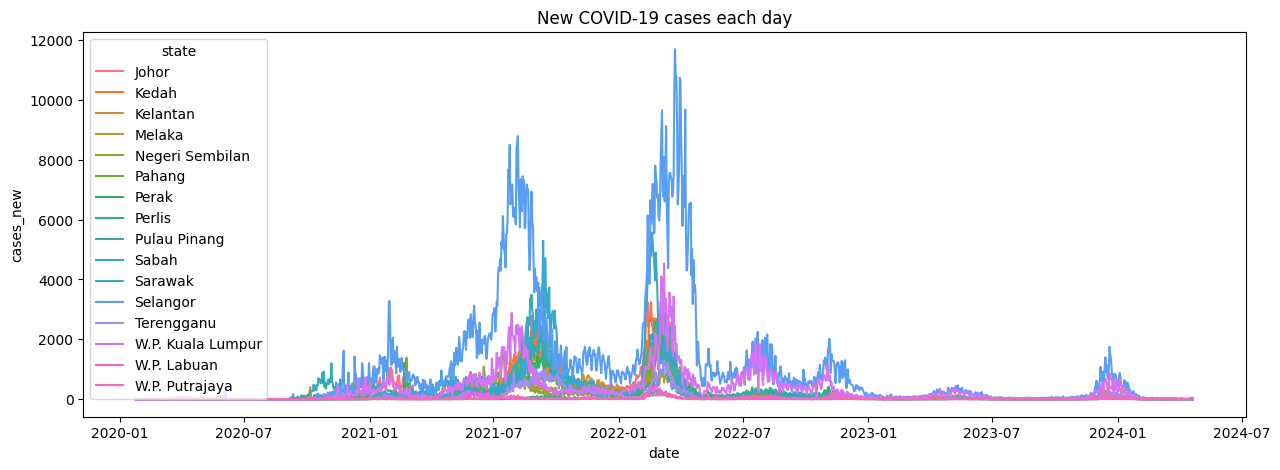

In [223]:
#cases_recovered
plt.figure(figsize=(15,5))
plt.title('New COVID-19 cases each day')
sns.lineplot(x=df['date'], y=df['cases_new'],hue=df['state'])
plt.show()

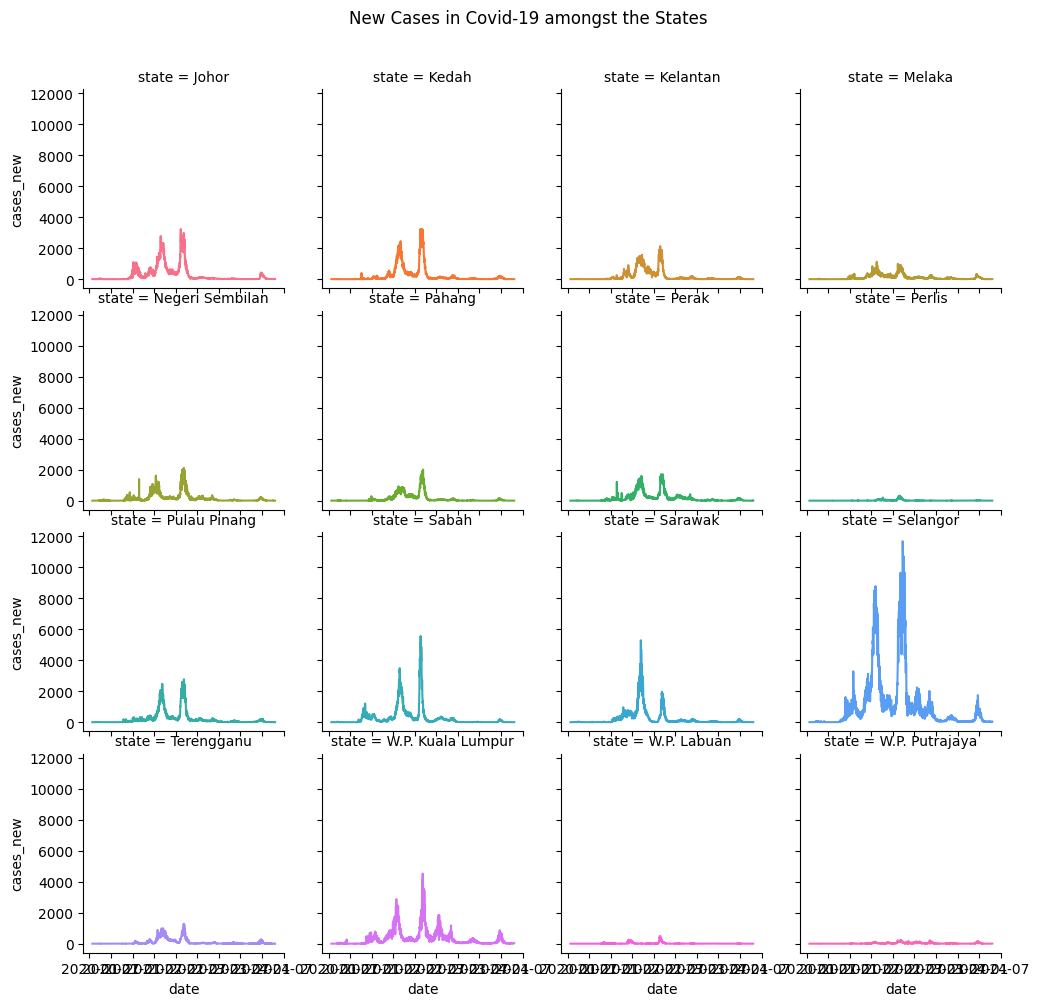

In [224]:
g= sns.FacetGrid(data=df,col='state',hue='state',col_wrap=4,height=4)
g.map(sns.lineplot,'date','cases_new')
g.figure.set_size_inches(10,10)
g.figure.suptitle('New Cases in Covid-19 amongst the States')
plt.subplots_adjust(top=0.9)
plt.show()

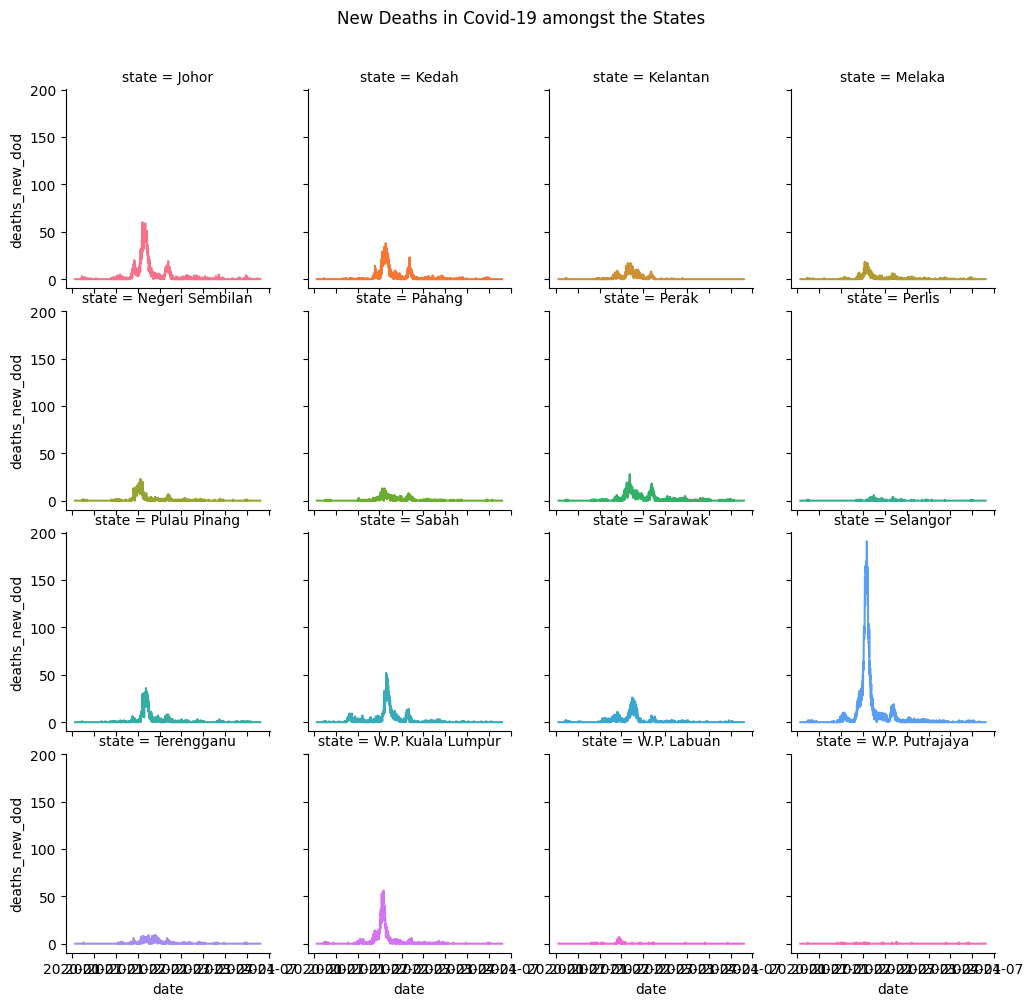

In [225]:
g= sns.FacetGrid(data=df,col='state',hue='state',col_wrap=4,height=4)
g.map(sns.lineplot,'date','deaths_new_dod')
g.figure.set_size_inches(10,10)
g.figure.suptitle('New Deaths in Covid-19 amongst the States')
plt.subplots_adjust(top=0.9)
plt.show()

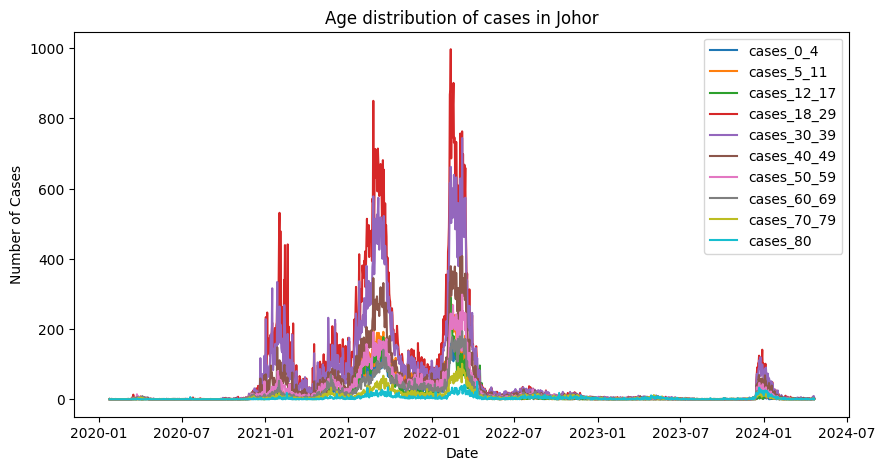

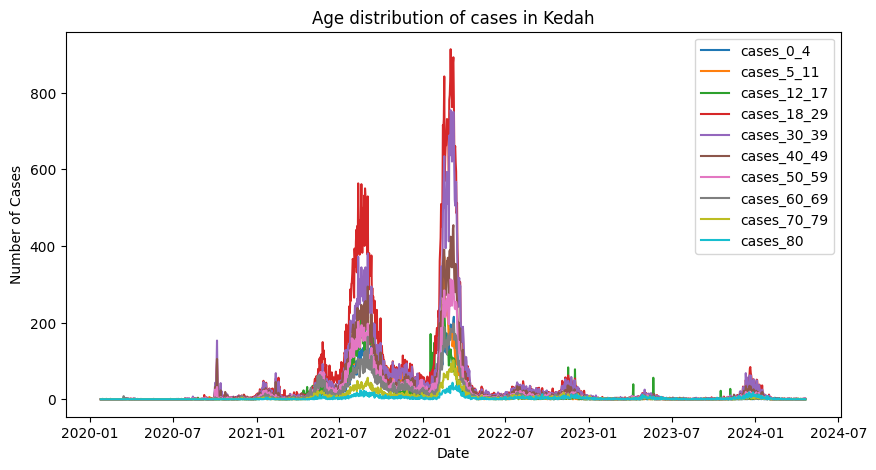

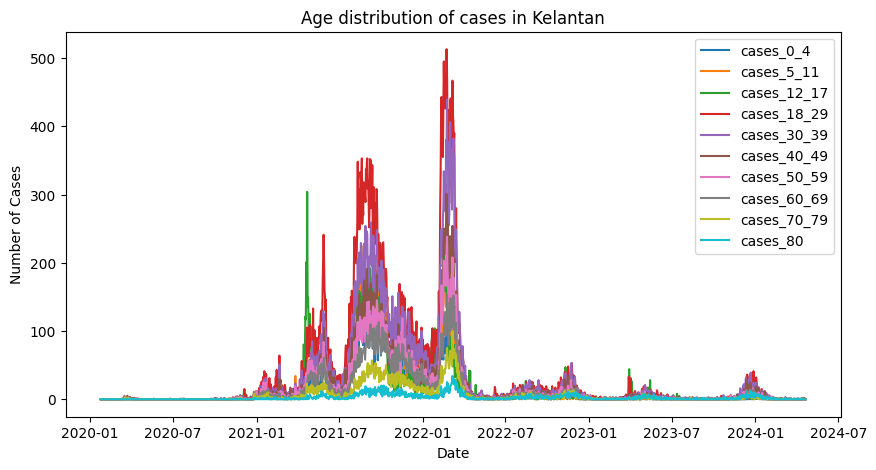

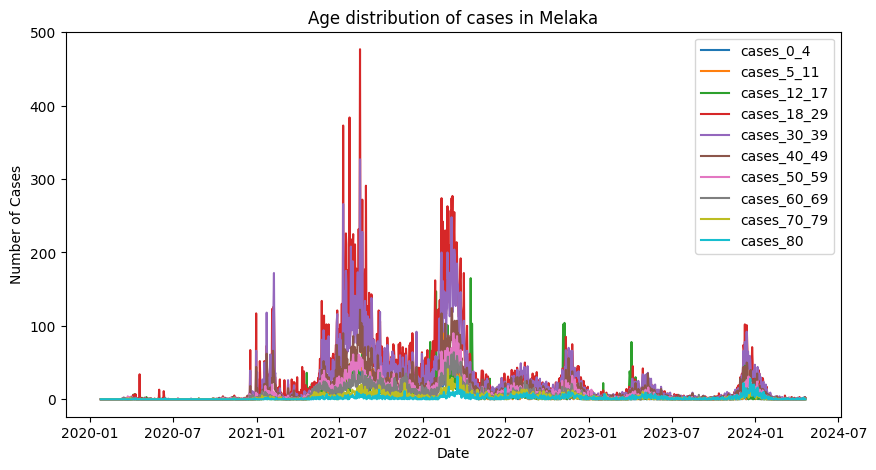

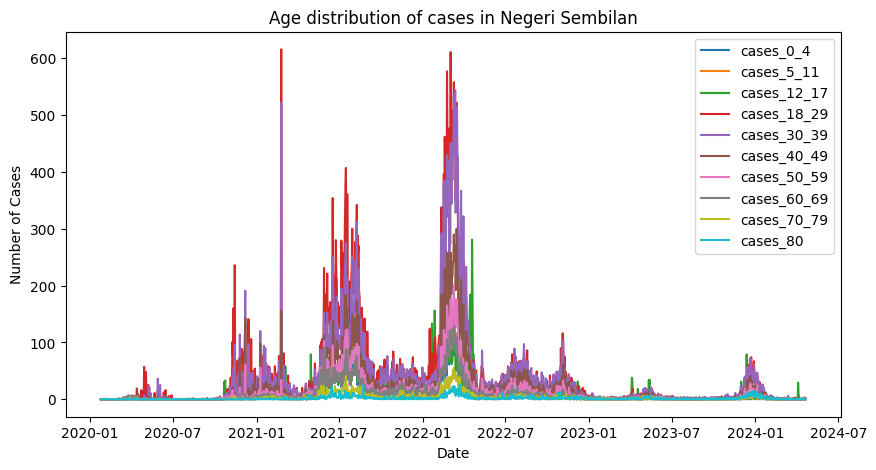

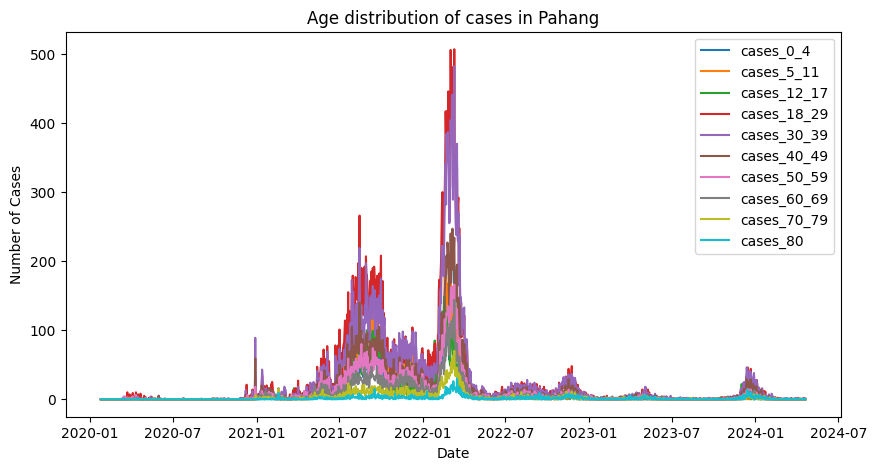

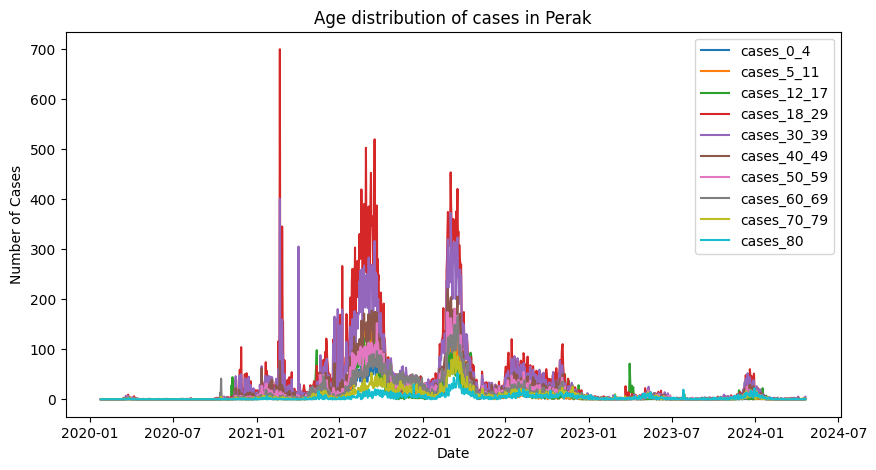

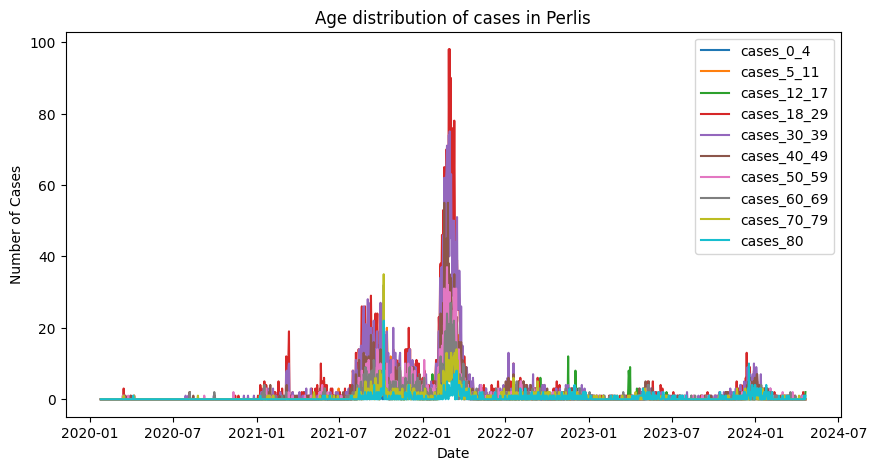

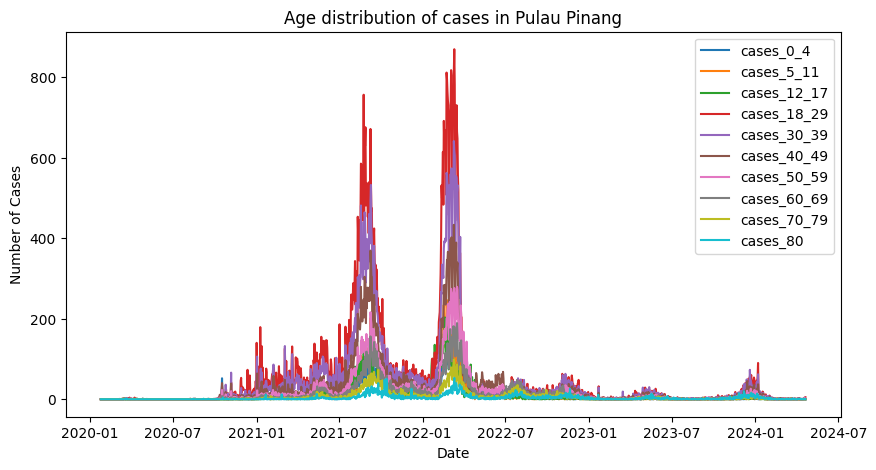

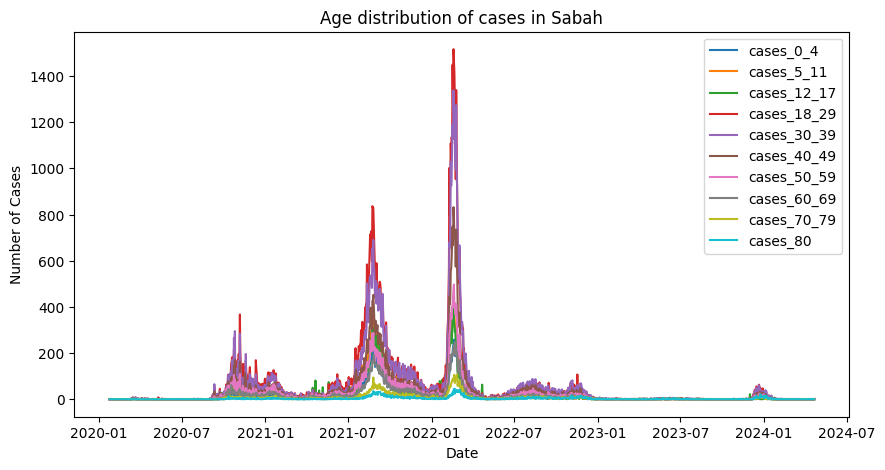

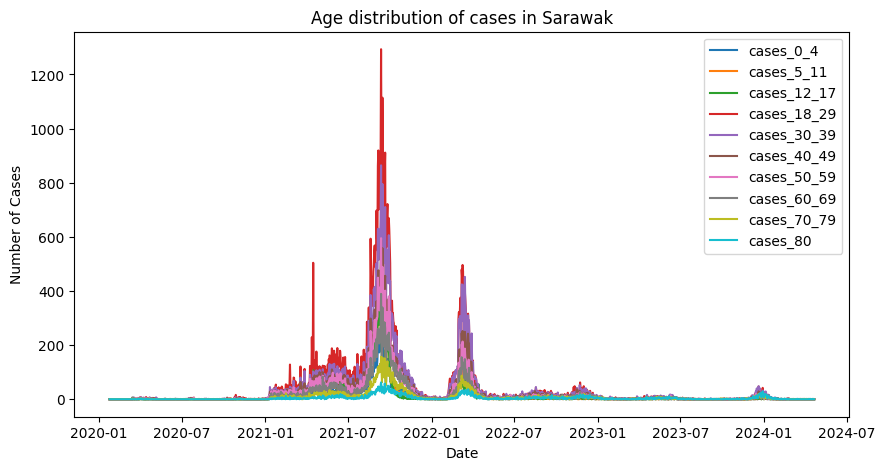

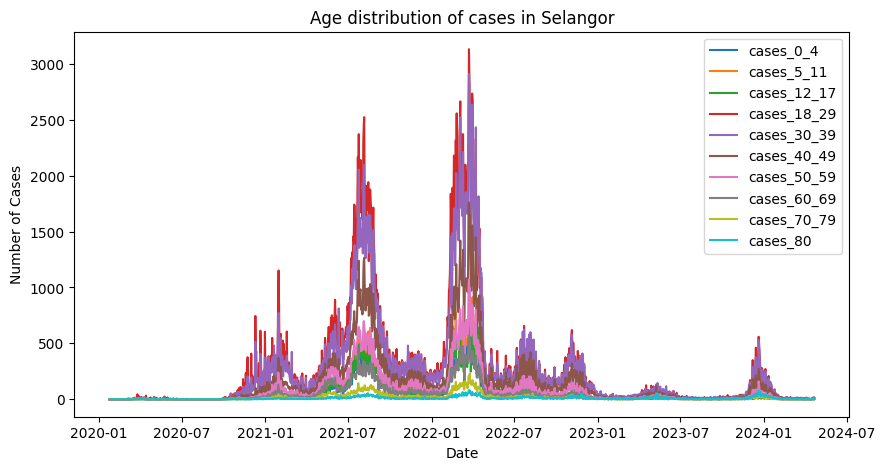

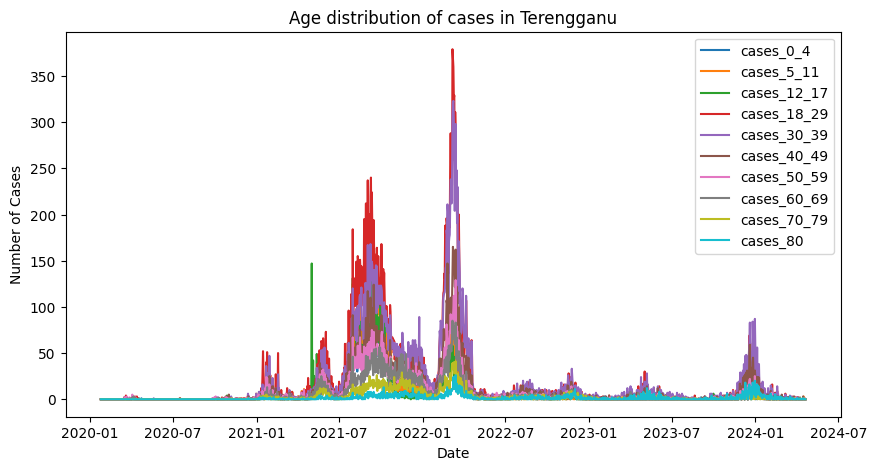

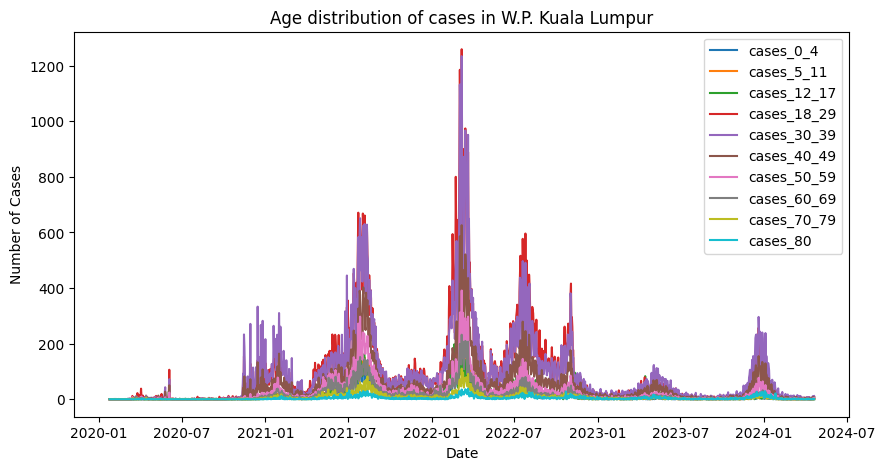

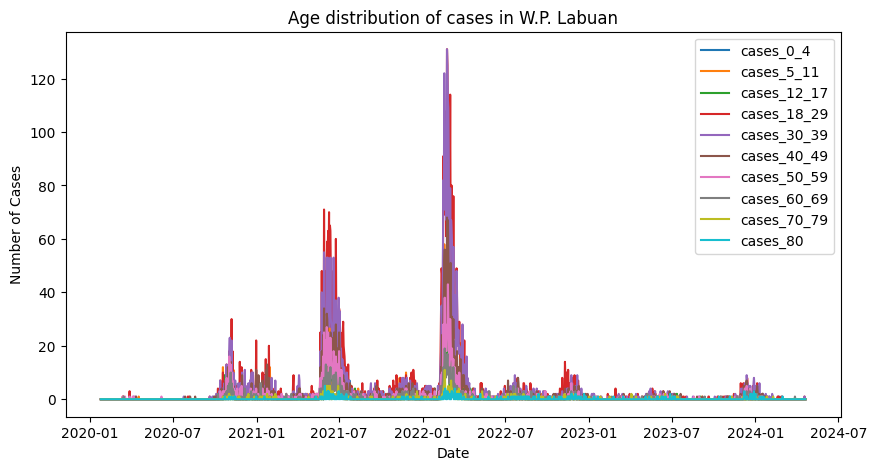

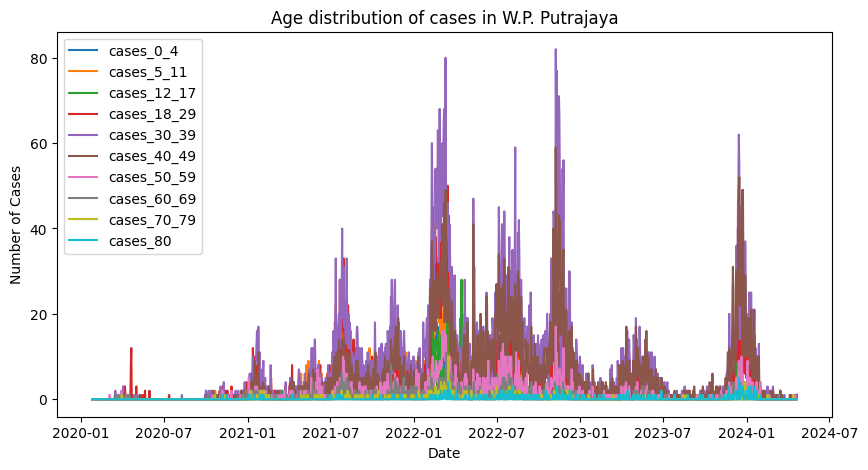

In [226]:
age_cols =['cases_0_4', 'cases_5_11', 'cases_12_17',
       'cases_18_29', 'cases_30_39', 'cases_40_49', 'cases_50_59',
       'cases_60_69', 'cases_70_79', 'cases_80']

for state in df['state'].unique():
    plt.figure(figsize=(10,5))
    plt.title(f'Age distribution of cases in {state}')
    for age in age_cols:
        sns.lineplot(x=df['date'],y=df.loc[df['state']== state,age],label=age)
    plt.xlabel('Date')
    plt.ylabel('Number of Cases')
    plt.show()

        

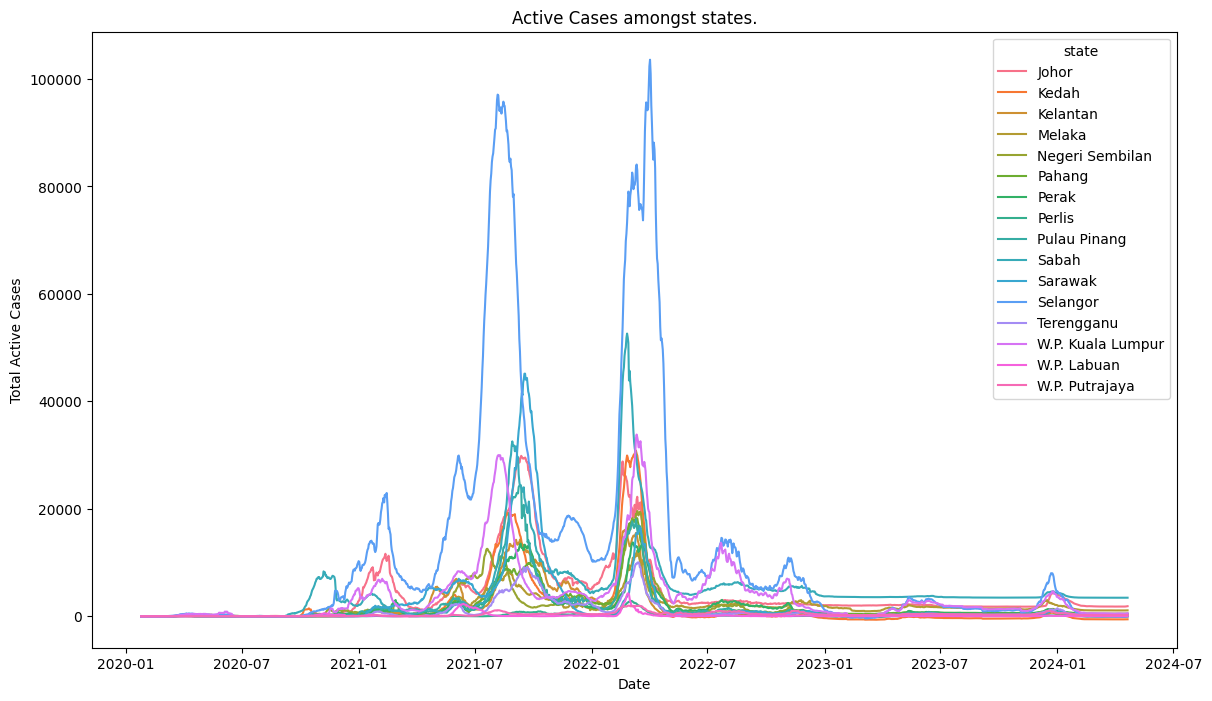

In [227]:
#Cases Active
plt.figure(figsize=(14,8))
plt.title('Active Cases amongst states.')
sns.lineplot(x=df['date'],y=df['cases_active'],hue=df['state'])
plt.xlabel('Date')
plt.ylabel('Total Active Cases')
plt.show()

In [228]:
df.columns

Index(['date', 'state', 'cases_new', 'cases_import', 'cases_recovered',
       'cases_active', 'cases_unvax', 'cases_pvax', 'cases_fvax',
       'cases_boost', 'cases_0_4', 'cases_5_11', 'cases_12_17', 'cases_18_29',
       'cases_30_39', 'cases_40_49', 'cases_50_59', 'cases_60_69',
       'cases_70_79', 'cases_80', 'deaths_new_dod', 'deaths_bid_dod',
       'rtk-ag_x', 'pcr_x', 'daily_partial', 'daily_full', 'daily_booster',
       'daily_booster2', 'daily', 'beds_hospital', 'beds_covid_hospital',
       'admitted_pui_hospital', 'admitted_covid_hospital',
       'admitted_total_hospital', 'discharged_pui_hospital',
       'discharged_covid_hospital', 'discharged_total_hospital',
       'hosp_covid_hospital', 'hosp_pui_hospital', 'hosp_noncovid_hospital',
       'beds_icu', 'beds_icu_total', 'beds_icu_covid', 'vent', 'icu_covid',
       'icu_pui', 'icu_noncovid', 'vent_covid', 'vent_pui', 'vent_used',
       'vent_port_used', 'pfizer', 'astra', 'sinopharm', 'sinovac', 'day',
       'mo

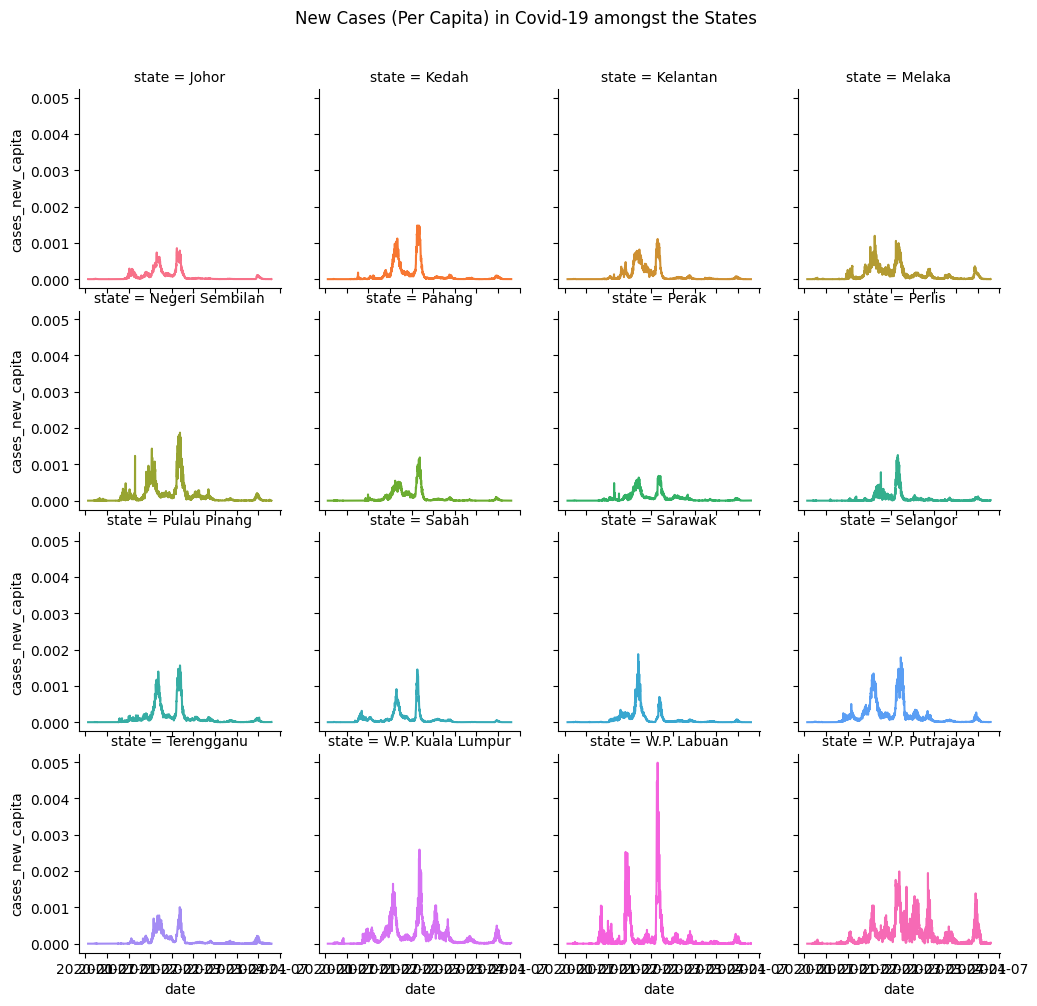

In [229]:
g= sns.FacetGrid(data=df,col='state',hue='state',col_wrap=4,height=4)
g.map(sns.lineplot,'date','cases_new_capita')
g.figure.set_size_inches(10,10)
g.figure.suptitle('New Cases (Per Capita) in Covid-19 amongst the States')
plt.subplots_adjust(top=0.9)
plt.show()

e:\Github Repositories\5011-cem-ml\.venv\lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


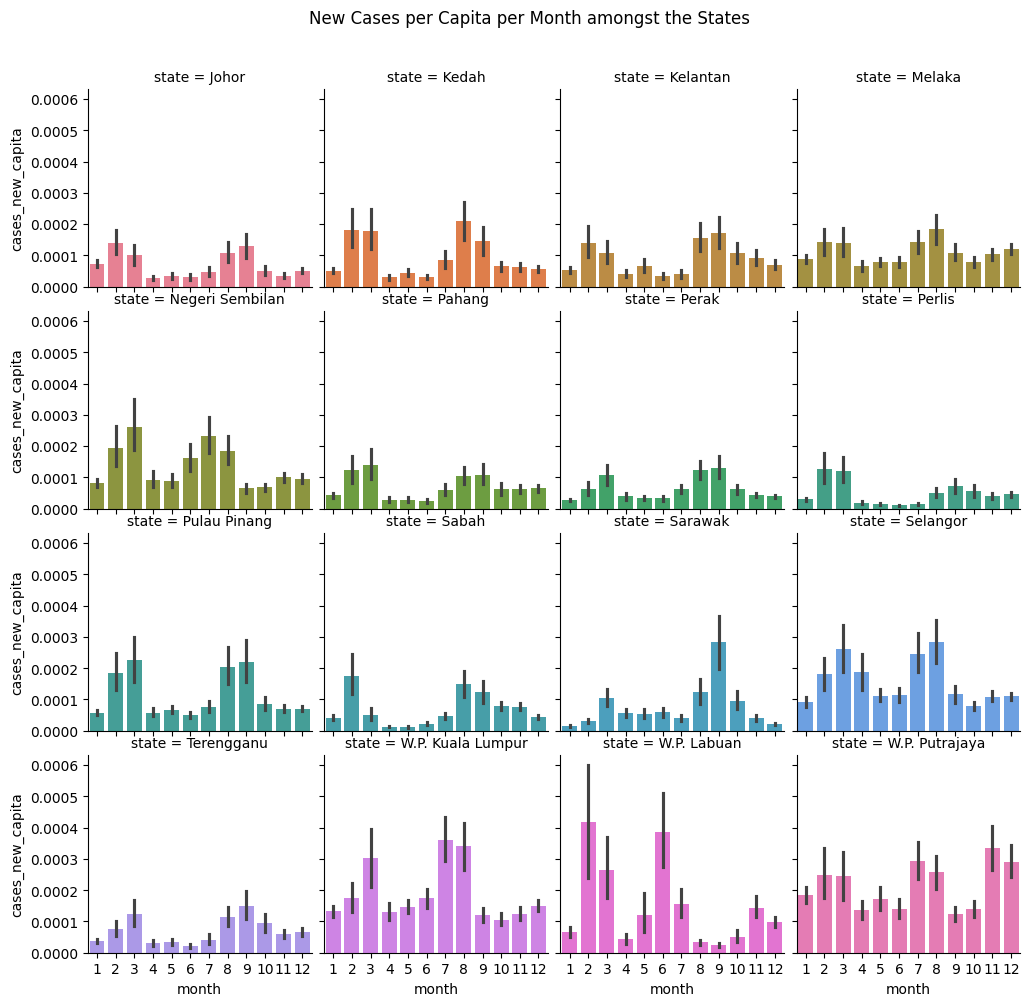

In [230]:
g= sns.FacetGrid(data=df,col='state',hue='state',col_wrap=4,height=4)
g.map(sns.barplot,'month','cases_new_capita')
g.figure.set_size_inches(10,10)
g.figure.suptitle('New Cases per Capita per Month amongst the States')
plt.subplots_adjust(top=0.9)
plt.show()

e:\Github Repositories\5011-cem-ml\.venv\lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


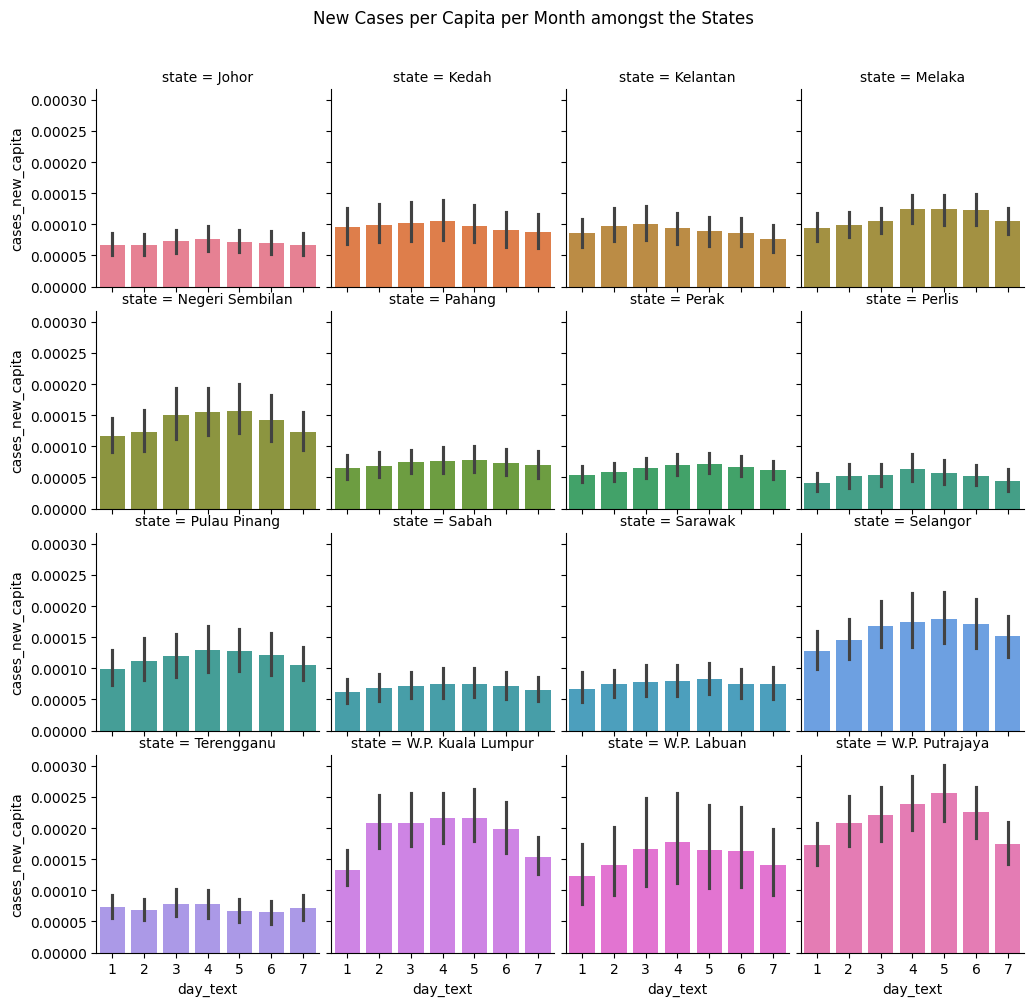

In [231]:
g= sns.FacetGrid(data=df,col='state',hue='state',col_wrap=4,height=4)
g.map(sns.barplot,'day_text','cases_new_capita')
g.figure.set_size_inches(10,10)
g.figure.suptitle('New Cases per Capita per Month amongst the States')
plt.subplots_adjust(top=0.9)
plt.show()

e:\Github Repositories\5011-cem-ml\.venv\lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


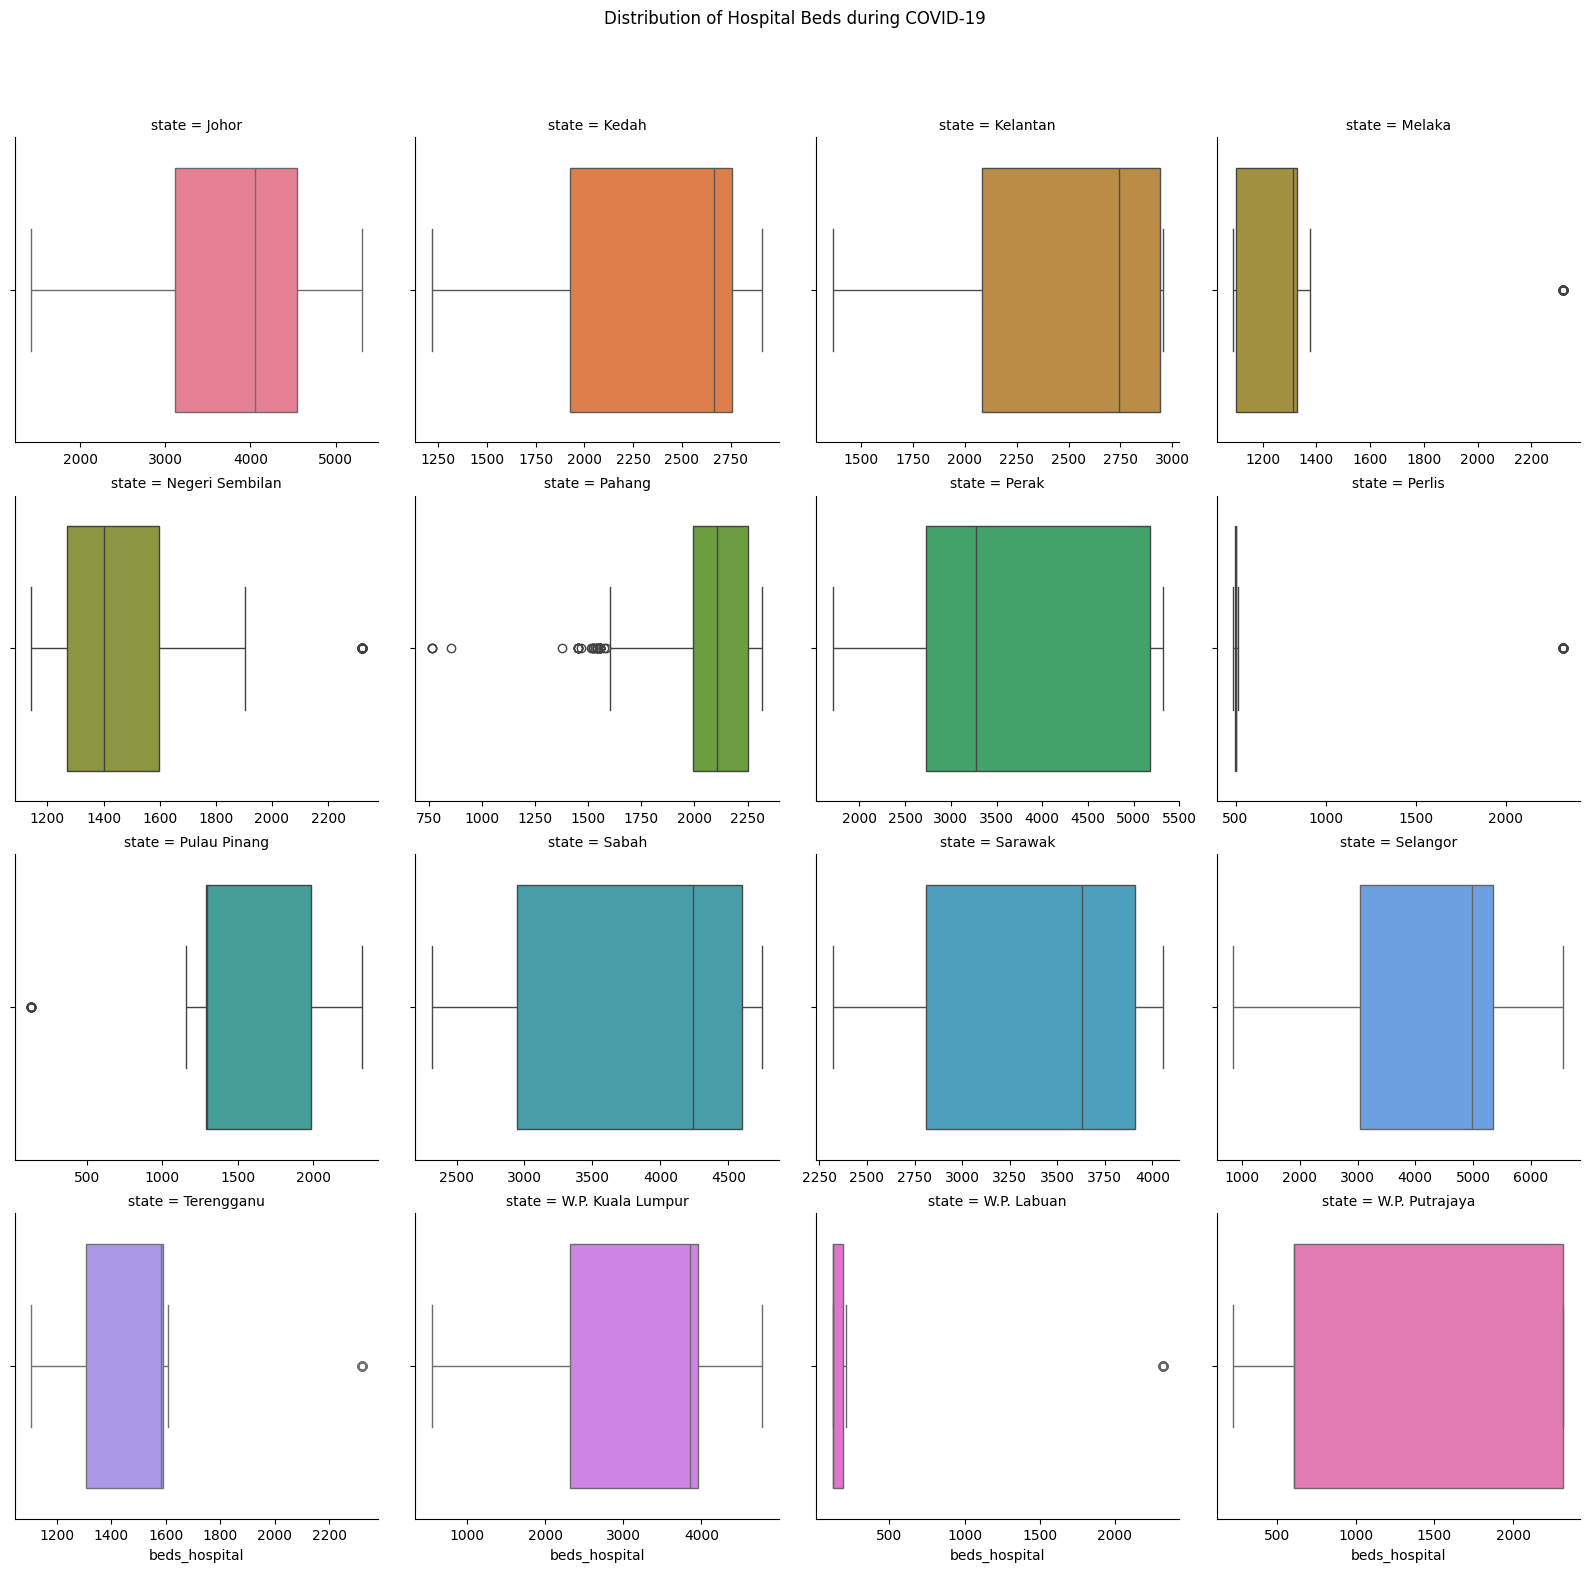

In [232]:
g= sns.FacetGrid(data=df,col='state',hue='state',col_wrap=4,height=4,sharex=False)
g.map(sns.boxplot,'beds_hospital')
#g.figure.set_size_inches(9,9)
g.figure.suptitle('Distribution of Hospital Beds during COVID-19')
plt.subplots_adjust(top=0.9)
plt.show()

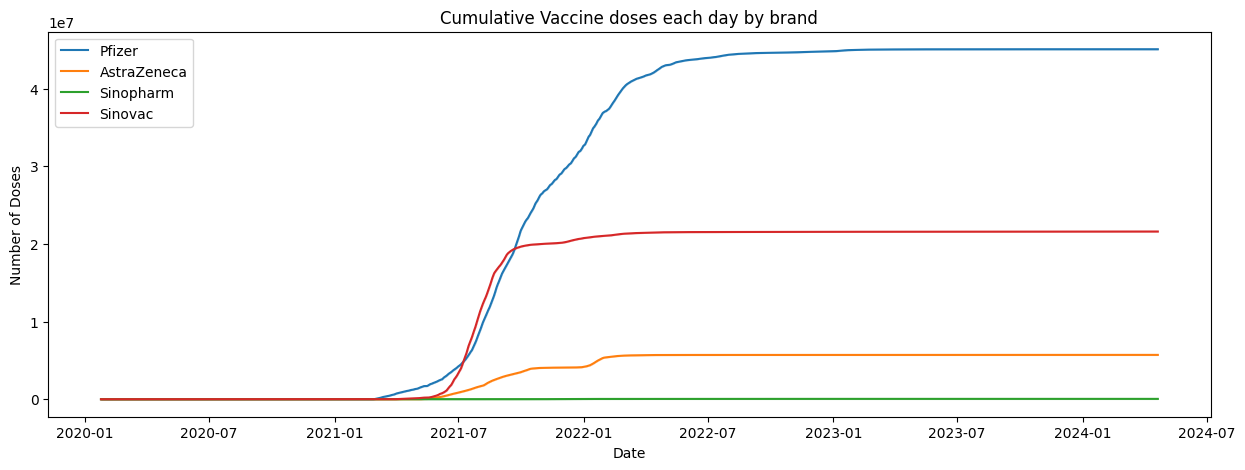

In [233]:
plt.figure(figsize=(15,5))
plt.title('Cumulative Vaccine doses each day by brand')
sns.lineplot(x=df['date'], y=df['pfizer'].cumsum(),label='Pfizer')
sns.lineplot(x=df['date'], y=df['astra'].cumsum(),label='AstraZeneca')
sns.lineplot(x=df['date'], y=df['sinopharm'].cumsum(),label='Sinopharm')
sns.lineplot(x=df['date'], y=df['sinovac'].cumsum(),label='Sinovac')
plt.ylabel('Number of Doses')
plt.xlabel('Date')
plt.show()

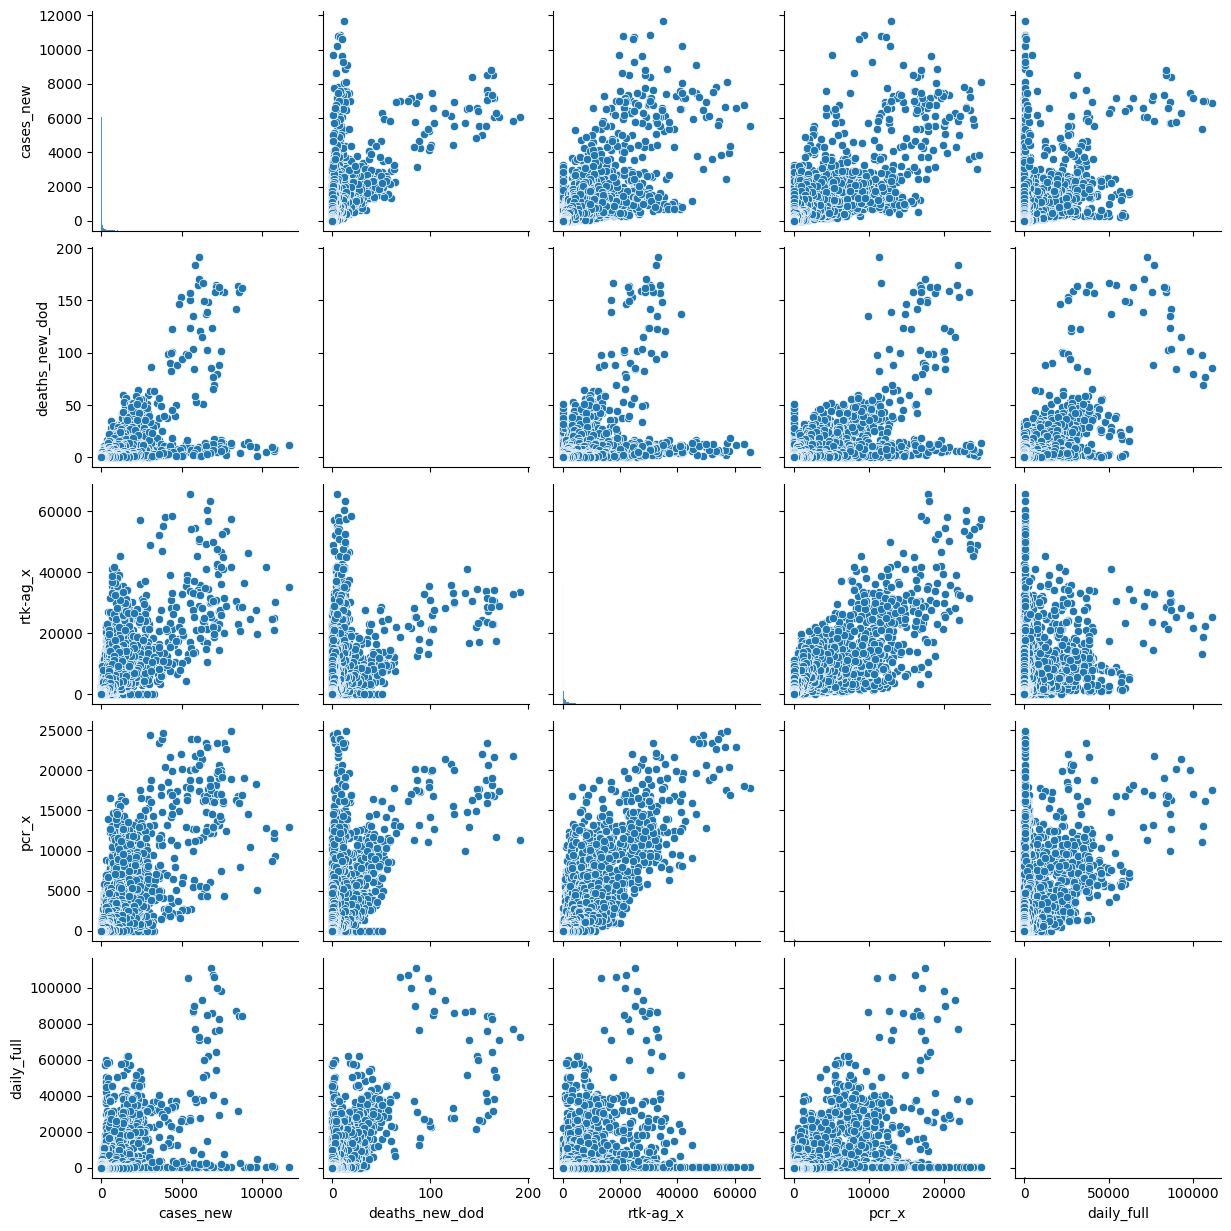

In [234]:
pp_cols = ['cases_new',  
    'deaths_new_dod', 'rtk-ag_x', 'pcr_x',  
    'daily_full' ]
sns.pairplot(df[pp_cols],)

Feature Secletion

Using Heatmap

In [235]:
df

date              state  cases_new  cases_import  cases_recovered  \
0     2020-01-25              Johor          4             4                0   
1     2020-01-25              Kedah          0             0                0   
2     2020-01-25           Kelantan          0             0                0   
3     2020-01-25             Melaka          0             0                0   
4     2020-01-25    Negeri Sembilan          0             0                0   
...          ...                ...        ...           ...              ...   
24763 2024-04-20           Selangor         39             0                8   
24764 2024-04-20         Terengganu          0             0                0   
24765 2024-04-20  W.P. Kuala Lumpur         33             0                5   
24766 2024-04-20        W.P. Labuan          0             0                0   
24767 2024-04-20     W.P. Putrajaya          3             0                0   

       cases_active  cases_unvax  cases_pvax  cases_fvax  cases_boost  ...  \
0                 4            4           0           0            0  ...   
1                 0            0           0           0            0  ...   
2                 0            0           0           0            0  ...   
3                 0            0           0           0            0  ...   
4                 0            0           0           0            0  ...   
...             ...          ...         ...         ...          ...  ...   
24763            37            4           0           8           27  ...   
24764           299            0           0           0            0  ...   
24765           585            6           0           3           24  ...   
24766            28            0           0           0            0  ...   
24767           240            0           0           0            3  ...   

       cases_new_cumul  deaths_new_dod_cumul  daily_cumul  daily_full_cumul  \
0                    4                   0.0          0.0               0.0   
1                    4                   0.0          0.0               0.0   
2                    4                   0.0          0.0               0.0   
3                    4                   0.0          0.0               0.0   
4                    4                   0.0          0.0               0.0   
...                ...                   ...          ...               ...   
24763          5279819               37349.0   72654837.0        27550991.0   
24764          5279819               37349.0   72654837.0        27550991.0   
24765          5279852               37349.0   72654840.0        27550991.0   
24766          5279852               37349.0   72654840.0        27550991.0   
24767          5279855               37349.0   72654840.0        27550991.0   

       rtk-ag_x_cumul  pcr_x_cumul  astra_cumul  pfizer_cumul  \
0                 0.0          0.0          0.0           0.0   
1                 0.0          0.0          0.0           0.0   
2                 0.0          0.0          0.0           0.0   
3                 0.0          0.0          0.0           0.0   
4                 0.0          0.0          0.0           0.0   
...               ...          ...          ...           ...   
24763      38841950.0   13900557.0    5707686.0    45063055.0   
24764      38841950.0   13900557.0    5707686.0    45063055.0   
24765      38841950.0   13900557.0    5707686.0    45063055.0   
24766      38841950.0   13900557.0    5707686.0    45063055.0   
24767      38841950.0   13900557.0    5707686.0    45063055.0   

       sinopharm_x_cumul  sinovac_cumul  
0                    0.0            0.0  
1                    0.0            0.0  
2                    0.0            0.0  
3                    0.0            0.0  
4                    0.0            0.0  
...                  ...            ...  
24763            44306.0     21592494.0  
24764            44306.0     2159249

<Axes: >

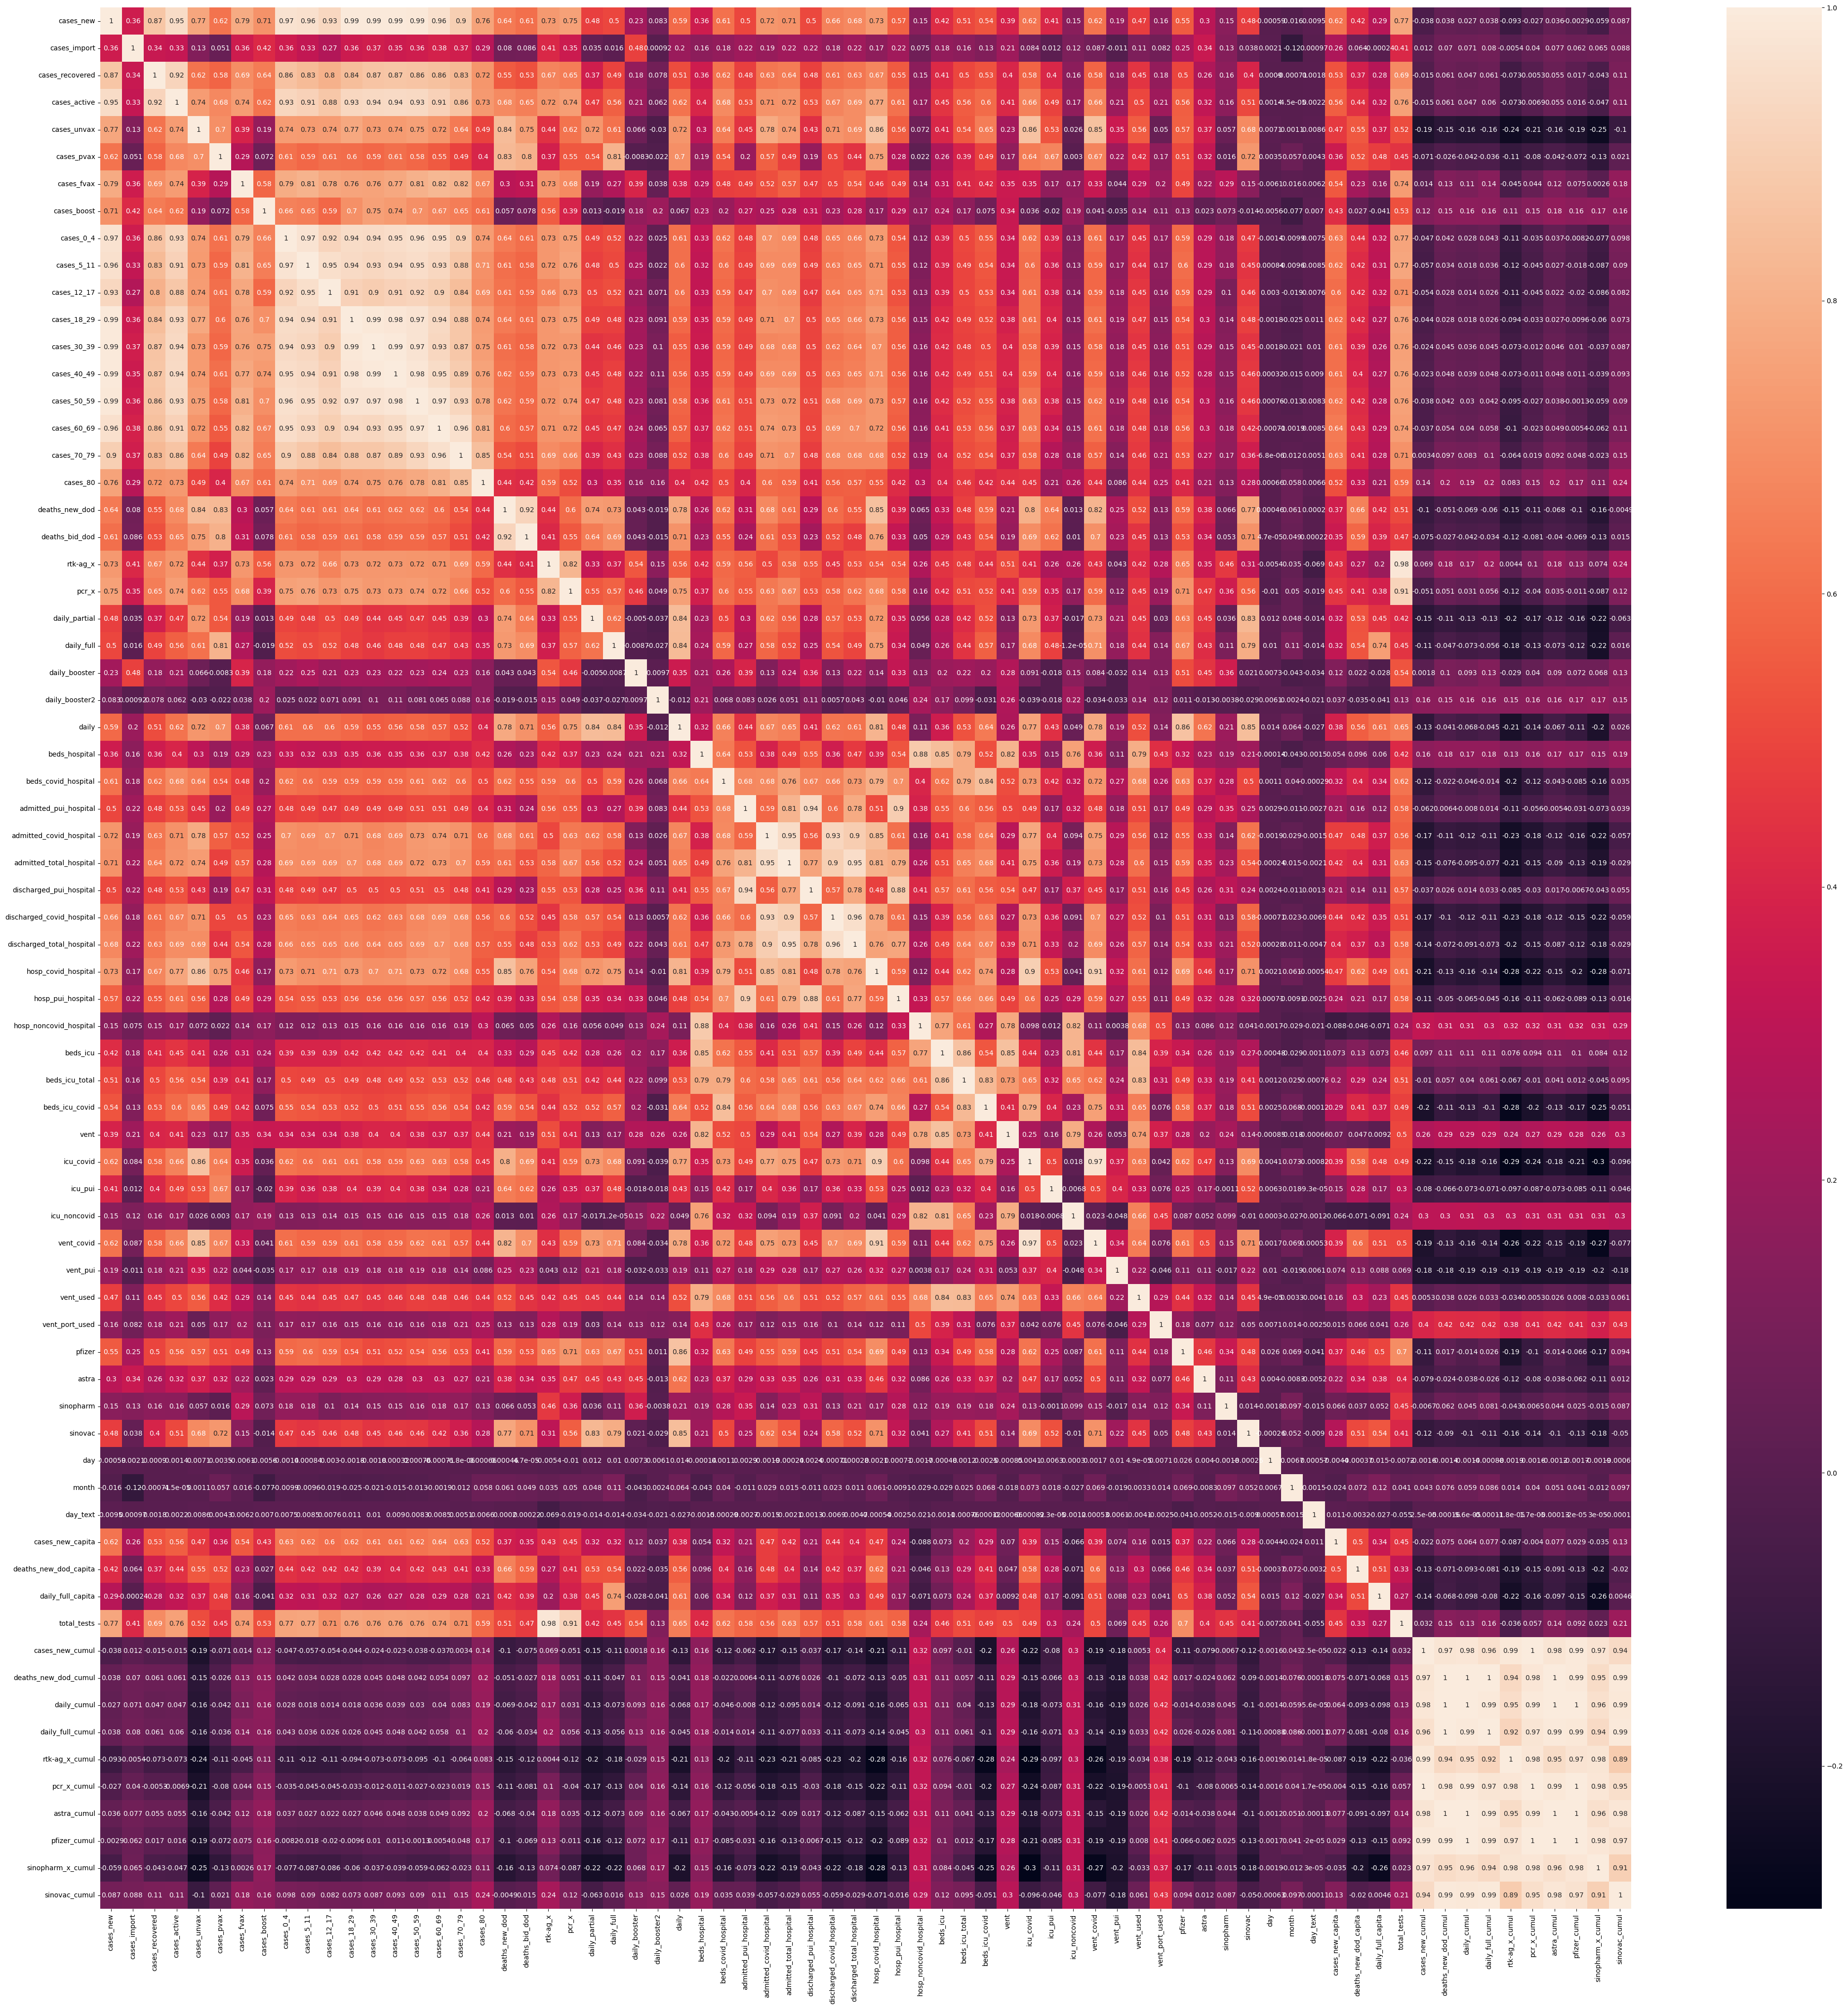

In [236]:
corrmatrix= df.drop(columns=['date','state']).corr()
plt.figure(figsize=(50,50))
sns.heatmap(corrmatrix,annot=True)

Text(0.5, 1.0, 'Correlation to cases_new Variable')

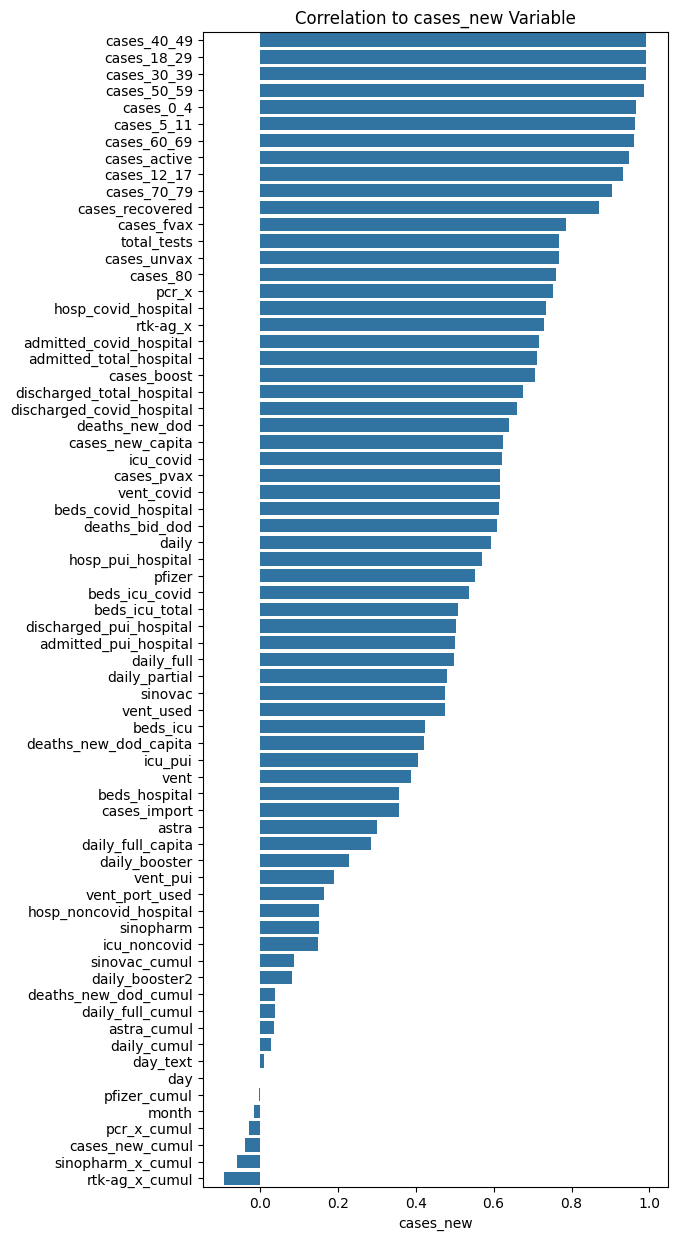

In [237]:
plt.figure(figsize=(6,15))
sns.barplot(corrmatrix['cases_new'].drop('cases_new').sort_values(ascending=False),orient = 'h')
plt.title('Correlation to cases_new Variable')


In [238]:
type(corrmatrix['cases_new'])


pandas.core.series.Series

In [239]:
col_to_drop = []
for col, v in corrmatrix['cases_new'].items():
    if v < 0.7:
        col_to_drop.append(col)


In [240]:
df.drop(columns=col_to_drop,inplace=True)

<Axes: >

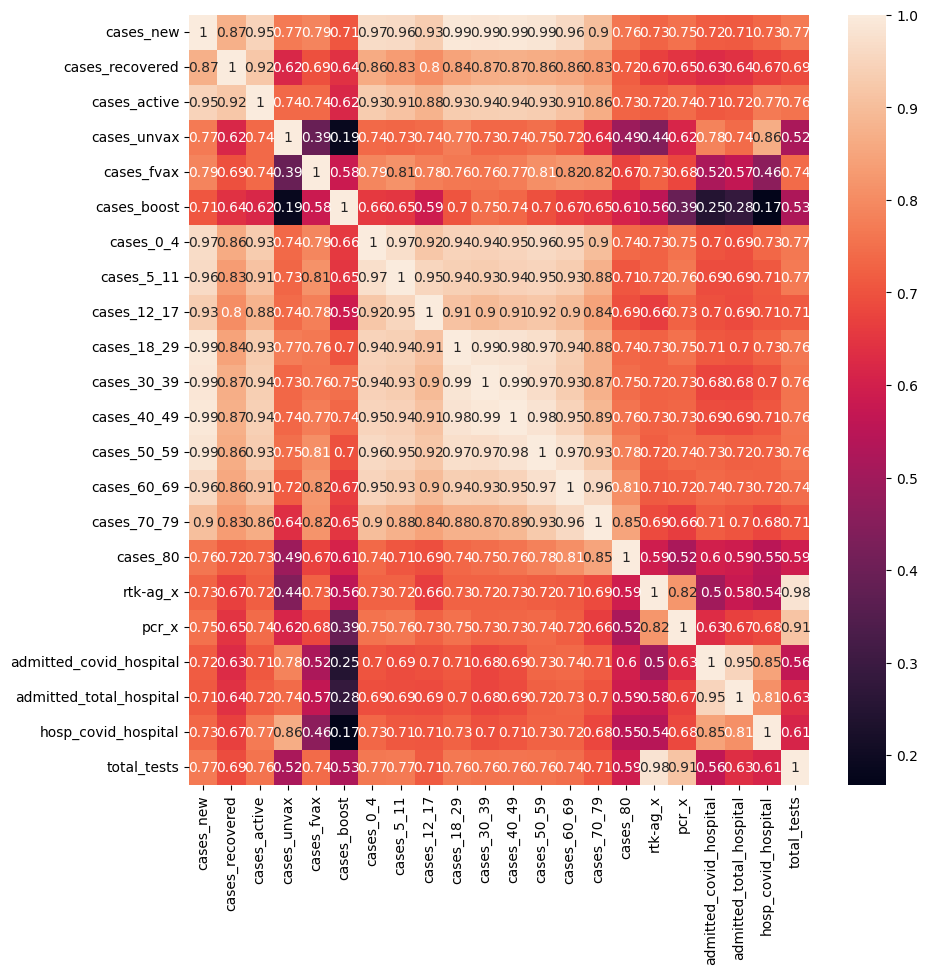

In [241]:
corrmatrix= df.drop(columns=['date','state']).corr()
plt.figure(figsize=(10,10))
sns.heatmap(corrmatrix,annot=True)

PACF